## Учебный проект: Анализ работы по привлечению клиентов развлекательного приложения Procrastinate Pro+ в период с 1 мая по 27 октября 2019 года.

### Введение

В развлекательном приложении Procrastinate Pro+ дела идут все хуже и хуже. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Поставлена задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.


В рамках этого проекта необходимо решить следующие задачи и ответить на вопросы:

- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.


Для решения этих задач и ответов на поставленные вопросы необходимо выполнить следующие работы:

- Загрузить и подготовить данные к анализу;
- Загрузить учебные функкции маркетингового анализа и адоптировать их к учебному проекту;
- Провести исследовательский анализ данных;
- Провести маркетинговый анализ с помощью адоптированных учебных функций;
- Оценить окупаемость рекламы;
- Сформулировать выводы в виде рекомендаций отделу маркетинга приложении Procrastinate Pro+

<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  Выполнил.
</div>
<div class="alert alert-success">
  
  <b>Комментарий ревьюера v.2</b>
    
  ✔️ Описание проекта есть.
</div>

### Загрузка и подготовка данных к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

<div class="alert alert-warning">
    
  <b>Комментарий ревьюера</b>
    
  ⚠️ Ссылки на скачивание файлов лучше убрать. По правилам Яндекса проекты нельзя выкладывать с прямыми ссылками к данным.
</div>

<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  После написания работы в Юпитере Яндекса я тестирую тетрадку в КОЛАБЕ, а данные загружаю из Яндекса прямой ссылкой, так меня научили в Практикуме. На проверку отправляю уже тестированный файл, уверенный в его работоспособности. В нем уже содержаться ссылки на файлы Яндекса. Другого способа я не знаю. Если он есть, подскажите. Либо надо затерать эти ссылки перед отправкой.
</div>
<div class="alert alert-warning">
    
  <b>Комментарий ревьюера v.2</b>
    
  ⚠️ Ссылки выше, которые открываются по "Скачать датасет;".
</div>

<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  Но я же их потом все рано подставляю, чтобы провести расчеты в КОЛАБЕ.
</div>
</div>
<div class="alert alert-warning">
    
  <b>Комментарий ревьюера v.3</b>
    
  ⚠️ Но в ноутбуке то пути указаны тренажерные.
</div>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt

Загружаю данные из трех файлов:

In [ ]:
#visits = pd.read_csv('/datasets/visits_info_short.csv') # загружаю данные из visits_info_short.csv ) - журнал сессий
#orders = pd.read_csv('//datasets/orders_info_short.csv') # загружаю данные из orders_info_short.csv  - покупки
#costs = pd.read_csv('/datasets/costs_info_short.csv') # загружаю данные из costs_info_short.csv      - траты на рекламу

visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv') # загружаю данные из visits_info_short.csv ) - журнал сессий
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv') # загружаю данные из orders_info_short.csv  - покупки
costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv') # загружаю данные из costs_info_short.csv      - траты на рекламу

Изучаю данные и выполняю предобработку:

In [ ]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Пропусков нет.
Необходимо переименование колонок и изменение типа данных колонок начала и конца сессии:

In [ ]:
visits = visits.rename(columns={'User Id': 'user_id',
                                'Region': 'region',
                                'Device': 'device',
                                'Channel': 'channel',
                                'Session Start': 'session_start',
                                'Session End': 'session_end'})

In [ ]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [ ]:
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [ ]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


Проверяем дубликаты:

In [ ]:
visits.duplicated().sum()

0

Дубликатов нет. ***visits готов к исследованию***.

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Пропусков нет. Необходимо проверить дубликаты, переименовать колонки в соответствии правилам PANDAS и измененить тип данных у колонки даты покупки:

In [ ]:
orders = orders.rename(columns={'User Id': 'user_id',
                                'Event Dt': 'event_dt',
                                'Revenue': 'revenue'})

In [ ]:
orders.duplicated().sum()

0

Дубликатов нет.

In [ ]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [ ]:
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


Дубликатов нет, колонки переименованы, данные в нужном формате. ***orders готов к исследованию***.

In [ ]:
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Пропусков нет. Необходимо проверить дубликаты, переименовать колонки в соответствии правилам PANDAS и измененить тип данных у колонки даты затрат на рекламу:

In [ ]:
costs.duplicated().sum()

0

Дубликатов нет

In [ ]:
costs = costs.rename(columns={'Channel': 'channel'})

In [ ]:
costs['dt'] = pd.to_datetime(costs['dt'])
#costs['dt'] = np.datetime64(costs['dt'])
#costs['dt'] = pd.to_datetime(costs['dt']))

In [ ]:
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [ ]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


Дубликатов нет, колонки переименованы, данные в нужном формате. ***costs готов к исследованию***.

Сформируем таблицу 'event' из таблицы  orders добавив колонку 'event_name' во все строчки со значением revenue

In [ ]:
event = orders
event = event.assign(event_name = 'revenue')
event = event.drop('revenue', axis=1)

In [ ]:
event.head()

,user_id,event_dt,event_name
0,188246423999,2019-05-01 23:09:52,revenue
1,174361394180,2019-05-01 12:24:04,revenue
2,529610067795,2019-05-01 11:34:04,revenue
3,319939546352,2019-05-01 15:34:40,revenue
4,366000285810,2019-05-01 13:59:51,revenue


In [ ]:
event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     40212 non-null  int64         
 1   event_dt    40212 non-null  datetime64[ns]
 2   event_name  40212 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 942.6+ KB


Дубликатов нет, колонки переименованы, данные в нужном формате. ***event готов к исследованию***.

**Вывод по разделу "Подготовка данных"**

Все данные переведены в датафреймы и готовы для исследования.

### Загрузка и адоптация функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Соберём функции для создания профилей, расчёта удержания, конверсии, LTV и ROI

#### функция для ***создания*** пользовательских ***профилей***

In [ ]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    ## добавляем флаги для всех событий из event_names
    #for event in event_names:
    #    if event in events['event_name'].unique():
    #        profiles[event] = profiles['user_id'].isin(
    #            events.query('event_name == @event')['user_id'].unique()
    #        )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    # Изменяем тип данных присоединяемого столбца датафрейма new_users
    new_users['dt'] = pd.to_datetime(new_users['dt'])
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    # приводим данные в столбцах обоих датафреймов к одному типу данных
    ad_costs ['dt'] = pd.to_datetime(ad_costs ['dt'])
    profiles ['dt'] = pd.to_datetime(profiles ['dt'])
    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### функция для ***расчёта удержания***

In [ ]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### функция для расчёта ***конверсии***

In [ ]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### функция для расчёта ***LTV*** и ***ROI***

In [ ]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC,
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time   # таблица динамики ROI
    )

#### функции для ***визуализации метрик***

функция для ***сглаживания*** фрейма

In [ ]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

функция для ***визуализации удержания***

In [ ]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    plt.tight_layout()
    plt.show()

функция для ***визуализации конверсии***

In [ ]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

функция для ***визуализации LTV и ROI***

In [ ]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

***Прежде чем приступить к исследовательскому анализу данных проверим работоспособность функций, написанных в предыдущих разделах и адоптированных для настоящей задачи на рандомных данных***

#### провека функций

Проверяем ***профили пользователей***

In [ ]:
profiles = get_profiles(visits, orders, costs)
display (profiles.head())

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


***Профили пользователей адоптированы***

Проверяем функцию расчета ***удержания***

In [ ]:
retention_raw, retention_grouped, retention_in_time =get_retention(
    profiles,
    visits,
    datetime(2019, 6, 14).date(),
    14,
    dimensions=[],
    ignore_horizon=False,
)

In [ ]:
display (retention_raw.head())

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,session_start,lifetime
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,2019-05-07 20:58:57,0
1,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,2019-05-08 06:00:42,0
2,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,2019-05-09 07:33:16,1
3,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000,2019-05-09 17:29:23,0
4,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000,2019-05-10 02:10:26,0


In [ ]:
display (retention_in_time.head())

cohort_size    0         1         2         3         4  \
payer dt                                                                     
False 2019-05-01          868  1.0  0.191244  0.074885  0.047235  0.031106   
      2019-05-02          728  1.0  0.185440  0.111264  0.046703  0.035714   
      2019-05-03          807  1.0  0.175960  0.091698  0.053284  0.026022   
      2019-05-04          960  1.0  0.179167  0.096875  0.065625  0.027083   
      2019-05-05          935  1.0  0.193583  0.096257  0.065241  0.034225   

                         5         6         7         8         9        10  \
payer dt                                                                       
False 2019-05-01  0.021889  0.023041  0.012673  0.013825  0.011521  0.006912   
      2019-05-02  0.017857  0.015110  0.012363  0.008242  0.005495  0.012363   
      2019-05-03  0.035936  0.022305  0.022305  0.011152  0.009913  0.008674   
      2019-05-04  0.016667  0.019792  0.009375  0.013542  0.010417  0.011458   
      2019-05-05  0.020321  0.020321  0.018182  0.010695  0.004278  0.005348   

                        11        12        13  
payer dt                                        
False 2019-05-01  0.010369  0.004608  0.005760  
      2019-05-02  0.010989  0.012363  0.004121  
      2019-05-03  0.004957  0.004957  0.004957  
      2019-05-04  0.009375  0.004167  0.007292  
      2019-05-05  0.006417  0.009626  0.003209

In [ ]:
retention_grouped.head()

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13
payer,,,,,,,,,,,,,,,
False,26625,1.0,0.179418,0.087324,0.053822,0.035493,0.024638,0.016714,0.013934,0.012432,0.009127,0.008150,0.006573,0.005784,0.004207
True,1386,1.0,0.446609,0.349928,0.286436,0.242424,0.220058,0.215729,0.185426,0.188312,0.155123,0.170996,0.170274,0.138528,0.144300


In [ ]:
retention_raw, retention_grouped, retention_in_time =get_retention(
    profiles,
    visits,
    datetime(2019, 6, 14).date(),
    14,
    dimensions=['channel'],
    ignore_horizon=False,
)

In [ ]:
retention_grouped.head()

cohort_size    0         1         2         3  \
payer channel                                                              
False AdNonSense                 1047  1.0  0.188157  0.082139  0.057307   
      FaceBoom                   2974  1.0  0.171822  0.088097  0.051446   
      LeapBob                     739  1.0  0.175913  0.087957  0.041949   
      MediaTornado               1033  1.0  0.192643  0.087125  0.061955   
      OppleCreativeMedia          742  1.0  0.171159  0.101078  0.049865   

                                 4         5         6         7         8  \
payer channel                                                                
False AdNonSense          0.042025  0.021968  0.020057  0.011461  0.010506   
      FaceBoom            0.035642  0.024210  0.018494  0.017485  0.012441   
      LeapBob             0.028417  0.023004  0.021651  0.023004  0.006766   
      MediaTornado        0.027106  0.030978  0.016457  0.010649  0.020329   
      OppleCreativeMedia  0.030997  0.018868  0.028302  0.009434  0.010782   

                                 9        10        11        12        13  
payer channel                                                               
False AdNonSense          0.010506  0.010506  0.007641  0.007641  0.007641  
      FaceBoom            0.007734  0.007061  0.003362  0.008070  0.003026  
      LeapBob             0.010825  0.009472  0.005413  0.001353  0.006766  
      MediaTornado        0.006776  0.008712  0.014521  0.006776  0.005808  
      OppleCreativeMedia  0.014825  0.005391  0.004043  0.008086  0.008086

In [ ]:
retention_raw, retention_grouped, retention_in_time =get_retention(
    profiles,
    visits,
    datetime(2019, 6, 14).date(),
    14,
    dimensions=['device'],
    ignore_horizon=False,
)

In [ ]:
retention_grouped.head()

cohort_size    0         1         2         3         4  \
payer device                                                              
False Android         6298  1.0  0.190219  0.091616  0.052715  0.036996   
      Mac             5246  1.0  0.169081  0.085398  0.054136  0.031834   
      PC              5443  1.0  0.178578  0.084696  0.053463  0.034540   
      iPhone          9638  1.0  0.178460  0.087051  0.054576  0.037041   
True  Android          322  1.0  0.444099  0.341615  0.276398  0.192547   

                      5         6         7         8         9        10  \
payer device                                                                
False Android  0.024135  0.017625  0.014449  0.012067  0.010638  0.008098   
      Mac      0.026687  0.017537  0.012772  0.010675  0.010484  0.007244   
      PC       0.025170  0.016351  0.013412  0.013412  0.008451  0.007716   
      iPhone   0.023553  0.015875  0.014526  0.013073  0.007782  0.008923   
True  Android  0.229814  0.214286  0.192547  0.164596  0.167702  0.155280   

                     11        12        13  
payer device                                 
False Android  0.006034  0.006669  0.004128  
      Mac      0.005909  0.005909  0.004194  
      PC       0.006981  0.004593  0.005328  
      iPhone   0.007055  0.005810  0.003631  
True  Android  0.158385  0.133540  0.133540

In [ ]:
retention_raw, retention_grouped, retention_in_time =get_retention(
    profiles,
    visits,
    datetime(2019, 6, 14).date(),
    14,
    dimensions=['region'],
    ignore_horizon=False,
)

In [ ]:
retention_grouped.head()

cohort_size    0         1         2         3         4  \
payer region                                                                    
False France                3131  1.0  0.194826  0.089109  0.061642  0.030981   
      Germany               2696  1.0  0.178042  0.081973  0.045623  0.035608   
      UK                    3236  1.0  0.181397  0.086527  0.052534  0.035538   
      United States        17562  1.0  0.176517  0.087974  0.053923  0.036271   
True  France                 129  1.0  0.480620  0.418605  0.263566  0.248062   

                            5         6         7         8         9  \
payer region                                                            
False France         0.021718  0.020121  0.011817  0.011498  0.010220   
      Germany        0.022626  0.018917  0.012982  0.015208  0.010757   
      UK             0.030284  0.017305  0.017923  0.011125  0.009271   
      United States  0.024428  0.015659  0.013723  0.012413  0.008655   
True  France         0.255814  0.263566  0.193798  0.186047  0.178295   

                           10        11        12        13  
payer region                                                 
False France         0.010540  0.005430  0.005430  0.007665  
      Germany        0.010386  0.006677  0.005564  0.006306  
      UK             0.007417  0.007417  0.006489  0.002472  
      United States  0.007516  0.006605  0.005751  0.003587  
True  France         0.162791  0.193798  0.131783  0.186047

Функция расчета удержания работает корректно.

Проверим работоспособность функции ***get_conversion***(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)  для ***расчёта конверсии***.

In [ ]:
horizon_days =14

In [ ]:
result_raw, result_grouped, result_in_time = get_conversion(
    profiles,
    orders,
    datetime(2019, 6, 14).date(),
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)

In [ ]:
display (result_raw)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,event_dt,lifetime,cohort
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,2019-05-07 20:59:09,0.0,All users
1,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000,NaT,NaN,All users
2,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205,NaT,NaN,All users
3,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435,NaT,NaN,All users
4,92610596,2019-05-31 21:28:36,organic,Android,United States,2019-05-31,2019-05-01,False,0.000000,NaT,NaN,All users
...,...,...,...,...,...,...,...,...,...,...,...,...
28006,999879315295,2019-05-05 05:04:39,organic,iPhone,United States,2019-05-05,2019-05-01,False,0.000000,NaT,NaN,All users
28007,999884407339,2019-05-22 13:45:21,organic,iPhone,United States,2019-05-22,2019-05-01,False,0.000000,NaT,NaN,All users
28008,999904695968,2019-05-19 01:29:17,FaceBoom,Mac,United States,2019-05-19,2019-05-01,False,1.109483,NaT,NaN,All users
28009,999933266936,2019-05-16 17:37:14,organic,Mac,Germany,2019-05-16,2019-05-01,False,0.000000,NaT,NaN,All users


In [ ]:
result_grouped

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,28011,0.032594,0.037807,0.040627,0.042233,0.043661,0.044233,0.045125,0.045839,0.046196,0.046732,0.04691,0.047339,0.047481,0.047838


In [ ]:
result_in_time.head()

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
dt,,,,,,,,,,,,,,,
2019-05-01,909,0.031903,0.036304,0.038504,0.038504,0.040704,0.040704,0.040704,0.041804,0.042904,0.044004,0.044004,0.044004,0.044004,0.045105
2019-05-02,758,0.029024,0.035620,0.036939,0.036939,0.036939,0.036939,0.036939,0.038259,0.038259,0.038259,0.039578,0.039578,0.039578,0.039578
2019-05-03,849,0.031802,0.037691,0.043581,0.044759,0.047114,0.047114,0.047114,0.047114,0.047114,0.047114,0.047114,0.047114,0.047114,0.048292
2019-05-04,1015,0.035468,0.039409,0.040394,0.042365,0.047291,0.047291,0.048276,0.050246,0.051232,0.052217,0.052217,0.052217,0.052217,0.052217
2019-05-05,970,0.023711,0.026804,0.028866,0.030928,0.032990,0.032990,0.032990,0.032990,0.032990,0.032990,0.032990,0.032990,0.032990,0.032990


In [ ]:
result_raw, result_grouped, result_in_time = get_conversion(
    profiles,
    orders,
    datetime(2019, 6, 14).date(),
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)

In [ ]:
result_grouped

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,,
Android,6620,0.034139,0.037613,0.040483,0.041994,0.042900,0.043353,0.044260,0.044864,0.045166,0.045921,0.046073,0.046677,0.046828,0.046828
Mac,5531,0.034352,0.040680,0.043753,0.045019,0.046285,0.046646,0.047189,0.047912,0.048454,0.049358,0.049539,0.049901,0.049901,0.050262
PC,5701,0.028767,0.032801,0.035783,0.037713,0.039818,0.040519,0.041396,0.042098,0.042449,0.042800,0.042975,0.043326,0.043326,0.043852
iPhone,10159,0.032779,0.039177,0.041736,0.043410,0.044886,0.045575,0.046658,0.047446,0.047741,0.048036,0.048233,0.048627,0.048922,0.049414


In [ ]:
result_raw, result_grouped, result_in_time = get_conversion(
    profiles,
    orders,
    datetime(2019, 6, 14).date(),
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)

In [ ]:
display (result_grouped)

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
AdNonSense,1157,0.078652,0.085566,0.086430,0.088159,0.088159,0.089023,0.090752,0.090752,0.090752,0.091616,0.091616,0.092481,0.092481,0.092481
FaceBoom,3378,0.098875,0.106572,0.109532,0.111012,0.112197,0.112197,0.113973,0.113973,0.114565,0.114565,0.115157,0.115453,0.115749,0.116341
LeapBob,760,0.019737,0.022368,0.025000,0.025000,0.025000,0.025000,0.025000,0.026316,0.026316,0.026316,0.026316,0.027632,0.027632,0.027632
MediaTornado,1072,0.024254,0.027052,0.028918,0.030784,0.031716,0.032649,0.032649,0.034515,0.034515,0.034515,0.034515,0.034515,0.034515,0.034515
OppleCreativeMedia,760,0.014474,0.014474,0.015789,0.017105,0.018421,0.019737,0.019737,0.019737,0.019737,0.019737,0.019737,0.019737,0.019737,0.019737
RocketSuperAds,1085,0.039631,0.060829,0.067281,0.073733,0.079263,0.079263,0.080184,0.080184,0.082949,0.084793,0.087558,0.088479,0.089401,0.089401
TipTop,2342,0.049530,0.061059,0.068318,0.073442,0.077711,0.081127,0.081981,0.084970,0.084970,0.085824,0.085824,0.087105,0.087532,0.088813
WahooNetBanner,782,0.034527,0.040921,0.051151,0.052430,0.056266,0.057545,0.058824,0.058824,0.058824,0.060102,0.060102,0.061381,0.061381,0.062660
YRabbit,1087,0.022999,0.023919,0.025759,0.025759,0.026679,0.027599,0.027599,0.029439,0.029439,0.030359,0.030359,0.030359,0.030359,0.031279


Функции ***get_conversion*** - работоспособна

Проверяем работоспособность функции для расчёта ***LTV*** и ***ROI***

Проверка работоспособности функция для расчёта LTV и ROI

In [ ]:
ltv_raw, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = get_ltv(
                   profiles,
                   orders,
                   datetime(2019, 6, 14).date(),
                   horizon_days,
                   dimensions=[],
                   ignore_horizon=False)

In [ ]:
ltv_raw.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,event_dt,revenue,lifetime,cohort
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,2019-05-07 20:59:09,4.99,0.0,All users
1,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,2019-05-08 06:01:28,4.99,0.0,All users
2,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,2019-05-09 07:34:01,4.99,1.0,All users
3,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000,NaT,NaN,NaN,All users
4,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205,NaT,NaN,NaN,All users


In [ ]:
ltv_grouped.head()

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,28011,0.186716,0.250969,0.296932,0.340518,0.377794,0.408653,0.439835,0.46303,0.488722,0.511704,0.53419,0.554179,0.569393,0.590664


In [ ]:
ltv_in_time.head()

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
dt,,,,,,,,,,,,,,,
2019-05-01,909,0.160297,0.215193,0.260209,0.294246,0.316205,0.316205,0.327184,0.338163,0.382079,0.426029,0.469945,0.502882,0.508372,0.524840
2019-05-02,758,0.157995,0.302942,0.335858,0.381939,0.408272,0.441201,0.454367,0.493865,0.526781,0.546530,0.572863,0.579446,0.592612,0.612361
2019-05-03,849,0.165748,0.249211,0.326796,0.379694,0.503227,0.550259,0.556137,0.562014,0.591402,0.620789,0.632544,0.667809,0.691319,0.708952
2019-05-04,1015,0.232138,0.286217,0.315714,0.359970,0.459369,0.518365,0.528197,0.557695,0.582276,0.601941,0.616690,0.656020,0.656020,0.690433
2019-05-05,970,0.140969,0.229546,0.244979,0.265557,0.291278,0.317000,0.332433,0.347866,0.353010,0.363299,0.389021,0.399309,0.419887,0.425031


In [ ]:
roi_grouped.head()

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,,
All users,28011,0.378159,0.493749,0.663661,0.785203,0.900463,0.999036,1.080639,1.163096,1.224433,1.292372,1.353147,1.412609,1.465466,1.505698,1.561948


In [ ]:
roi_in_time.head()

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
dt,,,,,,,,,,,,,,,,
2019-05-01,909,0.335336,0.478020,0.641723,0.775966,0.877469,0.942950,0.942950,0.975691,1.008431,1.139394,1.270455,1.401417,1.499639,1.516009,1.565120
2019-05-02,758,0.304545,0.518790,0.994737,1.102818,1.254132,1.340597,1.448721,1.491953,1.621651,1.729732,1.794581,1.881046,1.902662,1.945894,2.010743
2019-05-03,849,0.309859,0.534915,0.804273,1.054662,1.225377,1.624054,1.775839,1.794807,1.813776,1.908617,2.003459,2.041396,2.155206,2.231079,2.287984
2019-05-04,1015,0.332020,0.699169,0.862047,0.950890,1.084184,1.383561,1.561246,1.590861,1.679703,1.753739,1.812967,1.857389,1.975846,1.975846,2.079496
2019-05-05,970,0.329799,0.427439,0.696019,0.742814,0.805208,0.883200,0.961192,1.007987,1.054782,1.070380,1.101577,1.179569,1.210766,1.273159,1.288758


In [ ]:
ltv_raw, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = get_ltv(
                   profiles,
                   orders,
                   datetime(2019, 6, 14).date(),
                   horizon_days,
                   dimensions=['device'],
                   ignore_horizon=False)

In [ ]:
ltv_grouped

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,,
Android,6620,0.191935,0.265847,0.308363,0.346202,0.372589,0.411048,0.440446,0.461551,0.479642,0.503763,0.520346,0.537683,0.558036,0.578542
Mac,5531,0.205182,0.271058,0.323385,0.364903,0.396480,0.421741,0.444298,0.464327,0.499709,0.525874,0.553126,0.570268,0.583079,0.599318
PC,5701,0.171587,0.223405,0.273296,0.310068,0.354199,0.390963,0.421598,0.439979,0.467988,0.485496,0.510879,0.530137,0.544141,0.575653
iPhone,10159,0.181750,0.245806,0.288344,0.340625,0.384253,0.409894,0.447242,0.476223,0.500292,0.523872,0.545985,0.569660,0.583512,0.602276


In [ ]:
roi_grouped

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,,,
Android,6620,0.358287,0.535703,0.741997,0.860659,0.966272,1.039919,1.147261,1.229311,1.288218,1.338711,1.406033,1.452318,1.500706,1.557514,1.614747
Mac,5531,0.405823,0.505594,0.667920,0.796860,0.899168,0.976976,1.039223,1.094805,1.144159,1.231346,1.295820,1.362972,1.405211,1.436780,1.476796
PC,5701,0.315952,0.543080,0.707083,0.864991,0.981377,1.121053,1.237411,1.334372,1.392548,1.481198,1.536610,1.616949,1.677901,1.722226,1.821963
iPhone,10159,0.410955,0.442263,0.598132,0.701644,0.828862,0.935025,0.997417,1.088298,1.158820,1.217389,1.274768,1.328575,1.386186,1.419892,1.465551


In [ ]:
ltv_raw, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = get_ltv(
                   profiles,
                   orders,
                   datetime(2019, 6, 14).date(),
                   horizon_days,
                   dimensions=['channel'],
                   ignore_horizon=False)

In [ ]:
ltv_grouped

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
AdNonSense,1157,0.439084,0.508954,0.521893,0.543457,0.556396,0.569334,0.586586,0.595212,0.599525,0.603838,0.603838,0.612463,0.621089,0.625402
FaceBoom,3378,0.550477,0.642102,0.684944,0.711533,0.729260,0.736646,0.754372,0.758804,0.767667,0.770622,0.779485,0.783917,0.786871,0.792780
LeapBob,760,0.098487,0.111618,0.131316,0.151013,0.183842,0.196974,0.216671,0.229803,0.256066,0.262632,0.269197,0.308592,0.315158,0.347987
MediaTornado,1072,0.135000,0.186203,0.256026,0.339897,0.415392,0.461940,0.475905,0.517799,0.536418,0.564347,0.582966,0.615550,0.629515,0.634170
OppleCreativeMedia,760,0.091934,0.118197,0.144461,0.177289,0.196987,0.216684,0.242947,0.249513,0.348118,0.354684,0.367816,0.367816,0.387513,0.413776
RocketSuperAds,1085,0.223521,0.370691,0.481069,0.577650,0.643880,0.680673,0.786535,0.837124,0.878516,0.952138,1.007327,1.034922,1.071714,1.113106
TipTop,2342,0.305576,0.465841,0.566836,0.716486,0.821742,0.930444,0.996494,1.058711,1.107720,1.188685,1.250474,1.310132,1.359569,1.425628
WahooNetBanner,782,0.185064,0.268018,0.395639,0.491394,0.587148,0.689246,0.733913,0.772199,0.829629,0.855153,0.880678,0.918964,0.950870,1.008299
YRabbit,1087,0.123947,0.146900,0.174443,0.211168,0.247893,0.280028,0.298390,0.330524,0.344296,0.376431,0.390202,0.399384,0.413155,0.426927


In [ ]:
roi_grouped

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,,
AdNonSense,1157,1.027312,0.427410,0.495423,0.508018,0.529009,0.541604,0.554198,0.570991,0.579388,0.583586,0.587784,0.587784,0.596180,0.604577,0.608775
FaceBoom,3378,1.106838,0.497341,0.580122,0.618829,0.642852,0.658868,0.665541,0.681556,0.685560,0.693568,0.696237,0.704245,0.708248,0.710918,0.716256
LeapBob,760,0.202263,0.486924,0.551848,0.649232,0.746617,0.908925,0.973849,1.071233,1.136157,1.266003,1.298465,1.330926,1.525696,1.558158,1.720466
MediaTornado,1072,0.226567,0.595850,0.821846,1.130023,1.500206,1.833416,2.038867,2.100502,2.285408,2.367589,2.490860,2.573040,2.716856,2.778491,2.799037
OppleCreativeMedia,760,0.244079,0.376658,0.484259,0.591860,0.726361,0.807062,0.887763,0.995364,1.022264,1.426253,1.453154,1.506954,1.506954,1.587655,1.695256
RocketSuperAds,1085,0.546180,0.409244,0.678698,0.880789,1.057618,1.178880,1.246243,1.440065,1.532690,1.608474,1.743269,1.844315,1.894837,1.962201,2.037985
TipTop,2342,1.393723,0.219252,0.334242,0.406706,0.514080,0.589602,0.667596,0.714987,0.759627,0.794792,0.852884,0.897218,0.940023,0.975494,1.022891
WahooNetBanner,782,0.578517,0.319894,0.463285,0.683886,0.849403,1.014920,1.191401,1.268612,1.334792,1.434063,1.478183,1.522303,1.588484,1.643634,1.742905
YRabbit,1087,0.280681,0.441593,0.523369,0.621501,0.752343,0.883186,0.997673,1.063094,1.177581,1.226647,1.341134,1.390200,1.422911,1.471976,1.521042


Функции для ***расчёта LTV и ROI*** - работоспособна

проверяем работоспособность функции для ***сглаживания фрейма***

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

Проверяем работоспособность функции для ***визуализации удержания***

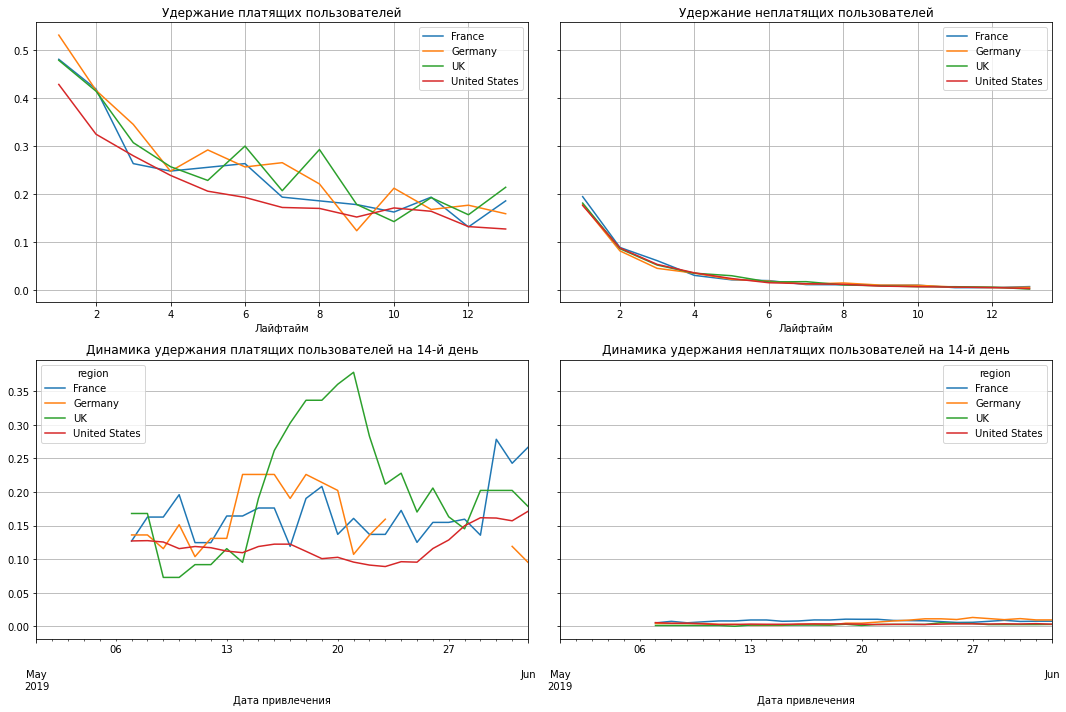

In [ ]:
plot_retention(retention_grouped, retention_in_time, 14, window=7) # retention_raw, retention_grouped, retention_in_time

Функции для ***визуализации удержания работает корректно***.

Проверяем работоспособность функции для ***визуализации конверсии***.

In [ ]:
conversion = result_grouped
conversion_history = result_in_time
horizon = horizon_days

In [ ]:
plot_conversion(conversion, conversion_history, horizon, window=7)

Функция для ***визуализации конверсии*** адоптирована и работает корректно.

Проверим работу функции для ***визуализации LTV и ROI***

In [ ]:
plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, horizon, window=7)

Функции для ***визуализации LTV и ROI*** работают корректно.

**Общий вывод по второму разделу**

Все функции проверены и по необходимости доработаны и подготовлены для исследовательского анализа данных.

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

`Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.`

Узнаем самую раннюю и самую позднюю даты первого посещения, существующие в пользовательских профилях. Самую раннюю сохраним в переменной `min_analysis_date`, а самую позднюю — в `observation_date`. Самая поздняя дата будет моментом анализа.
Зададим горизонт анализа — 14 дней, потому что в условии задания определено, что затраты на рекламу должны окупаться на 2е недели. Определим максимально возможную для такого горизонта дату привлечения и сохраним её в переменной `max_analysis_date`.

Создадим пользовательские профили

In [ ]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

In [ ]:
# определим доступный интервал привлечения пользователей
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max() # ваш код здесь

print(min_analysis_date, ' - минимальная дата привлечения пользователей')
print(observation_date, ' - дата наблюдения, она же - максимальная дата привлечения пользователей')

# зададим горизонт анализа и посчитаем максимальную дату привлечения
#analysis_horizon = 14
#max_analysis_date = observation_date - timedelta(
#        days=analysis_horizon - 1
#    )


#print(max_analysis_date, ' - максимальная дата привлечения пользователей')


***Вывод по первому пункту***:

Профили пользователей были созданы с помощью доработанной функции get_profiles и содержат в себе все необходимые параметры для дальнейшего исследования:
- user_id
- first_ts
- channel
- device
- region
- dt
- month
- payer
- acquisition_cost

Ограничение по дате наблюдения при горизонте 14 дней касается только дат, в которые нет данных за полные 14 дней. При проведении анализа имеет смысл выбрать дату наблюдения - 2019-10-14 00:00:00, как наиболее свежую и полностью обладающую данными по глубине горизонта.

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны:

In [ ]:
print (profiles['region'].unique(), ' - список стран приходящих в приложение')

In [ ]:
profiles_sum_region = profiles.groupby(by = ['region'])['user_id'].agg(['count']).sort_values('count', ascending = False)
print (profiles_sum_region)

In [ ]:
profiles_sum_region.plot(kind="bar");
plt.title('количество зареристрированных пользователей');

In [ ]:
profiles_pay_region = profiles.query('payer == True').groupby(by = ['region'])['payer'].agg(['count']).sort_values('count', ascending = False)
print (profiles_pay_region)

In [ ]:
profiles_pay_region.plot(kind="bar");
plt.title('количество платящих пользователей');

In [ ]:
profiles_sum_region = profiles_sum_region.merge(profiles_pay_region, on=['region'], how='left')
profiles_sum_region =profiles_sum_region.rename(columns={'count_x':'user_num', 'count_y':'ratio_pay'})
profiles_sum_region ['ratio_pay'] = profiles_sum_region ['ratio_pay'] / profiles_sum_region ['user_num']

In [ ]:
profiles_sum_region

United States впереди планеты всей в развлекательном приложении Procrastinate Pro+

Визуализируем:

In [ ]:
profiles_sum_region.sort_values('ratio_pay', ascending = False).plot(y='ratio_pay', kind="bar");
plt.title('доля платящих пользователей');

***Выводы по второму пункту***:

По количеству зарегистрированных пользователей, по количеству платящих пользователей и доле платящих пользовтелей есть явный лидер - United States. Хотя, если количество зарегистрированных пользователей отличается на порядок, то доля платящих всего в 2 раза. Группа аусайдеров достаточно ровная. Скорее всего методы привлечения у лидера и аусайдеров будут отличаться.

Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [ ]:
print (profiles['device'].unique(), ' - список устройств с которых приходят пользователи в приложение')

In [ ]:
profiles_sum_device = profiles.groupby(by = ['device'])['user_id'].agg(['count']).sort_values('count', ascending = False)
print (profiles_sum_device)

In [ ]:
profiles_sum_device.plot(kind="bar");
plt.title('количество использ. устройств пользователей');

In [ ]:
profiles_pay_device = profiles.query('payer == True').groupby(by = ['device'])['payer'].agg(['count']).sort_values('count', ascending = False)
print (profiles_pay_device)

In [ ]:
profiles_pay_device.plot(kind="bar");
plt.title('количество платящих пользователей от устройства');

In [ ]:
profiles_sum_device = profiles_sum_device.merge(profiles_pay_device, on=['device'], how='left')
profiles_sum_device =profiles_sum_device.rename(columns={'count_x':'user_num', 'count_y':'ratio_pay'})
profiles_sum_device ['ratio_pay'] = profiles_sum_device ['ratio_pay'] / profiles_sum_device ['user_num']

In [ ]:
profiles_sum_device

iPhone впереди планеты всей в развлекательном приложении Procrastinate Pro+

Визуализируем:

In [ ]:
profiles_sum_device.sort_values('ratio_pay', ascending = False).plot(y='ratio_pay', kind="bar");
plt.title('доля платящих пользователей по устройствам');

***Выводы по третьему пункту***:

Количество пользователей первый раз заходящих в развлекательное приложение Procrastinate Pro+ с определенного устройства практически пропорционольно числу платящих пользователей. Несколько больше доля платящих пользователей для Mac, чуть меньше для PC, значения долей около 5-6 %.

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [ ]:
print (profiles['channel'].unique(), ' - список рекламных источников с которых приходят пользователи в приложение')

In [ ]:
profiles_sum_channel = profiles.groupby(by = ['channel'])['user_id'].agg(['count']).sort_values('count', ascending = False)
print (profiles_sum_channel)

In [ ]:
profiles_sum_channel.plot(kind="bar", figsize=( 15 , 5 ));
plt.title('количество пользователей пришед. с различных рекламных каналов');

In [ ]:
profiles_pay_channel = profiles.query('payer == True').groupby(by = ['channel'])['payer'].agg(['count']).sort_values('count', ascending = False)
print (profiles_pay_channel)

In [ ]:
profiles_pay_channel.plot(kind="bar", figsize=( 15 , 5 ));
plt.title('количество платящих пользователей пришед. с различных рекламных каналов');

In [ ]:
profiles_sum_channel = profiles_sum_channel.merge(profiles_pay_channel, on=['channel'], how='left')
profiles_sum_channel =profiles_sum_channel.rename(columns={'count_x':'user_num', 'count_y':'ratio_pay'})
profiles_sum_channel ['ratio_pay'] = profiles_sum_channel ['ratio_pay'] / profiles_sum_channel ['user_num']

In [ ]:
profiles_sum_channel.sort_values('ratio_pay', ascending = False)

FaceBoom впереди планеты всей в развлекательном приложении Procrastinate Pro+. Именно с него приходит самая большая доля платящих клиентов.

Визуализируем:

In [ ]:
profiles_sum_channel.sort_values('ratio_pay', ascending = False).plot(y='ratio_pay', kind="bar", figsize=( 15 , 5 ));
plt.title('доля платящих пользователей по каналам');

***Выводы по четвертому пункту***:

Огромное количество регистрирующихся в приложении Procrastinate Pro+ органически, то есть без рекламы не платит. Доля "органических" плательщиков самая маленькая, но тем не менне количество их на третьем месте после  пришедших с FaceBoom и TipTop. А учитывая, что за organic не платят, это весьма хороший канал. После тройки лидеров привлечения все остальные каналы распределены достаточно равномерно и низко.

**Общий вывод по разделу "Исследовательский анализ данных"**

В третьем разделе составлены профили пользователей
Проведен исследовательский анализ этих профилей по следующим параментрам:
- channel
- device         
- region

1. Выявлено три наиболее значимых канала привлечения клиентов -  organic, FaceBoom, TipTop;
2. Не выявлено большой разницы в доле платящих клиентов на разныз девайсах;
3. Среди клиентов Procrastinate Pro+  имеется регион лидер - United States.
    

По бизнес-плану пользователи должны окупаться не позднее, чем 2е недели после регистрации. Поэтому горизонт примем равным 14 дней. Определив горизонт назначаем дату наблюдения не ранее 14 мая 2019 года, так как для более ранних дат у нас не хватит данных.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### исследование без групировки

Посчитаем общую сумму расходов на маркетинг.

In [ ]:
costs.info()
costs.head()

In [ ]:
print (round (costs['costs'].sum()), ' - затраты на маркетинг исходя из изначальных данных - costs')

In [ ]:
print (profiles.head()) # для памяти, чтобы копировать названия столбцов

In [ ]:
print (round(profiles['acquisition_cost'].sum()), ' - общая сумма расходов на маркетинг исходя из обработанных данных - profiles')

**Выводы по первому разделу**

Общая сумма расходов посчитанная двумя способами совпадает и равна 105497.

Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [ ]:
marcketing_costs_channel = profiles.groupby(by = ['channel'])['acquisition_cost'].agg(['sum']).sort_values('sum', ascending = False)
marcketing_costs_channel

In [ ]:
marcketing_costs_channel.sort_values('sum', ascending = False).plot(y='sum', kind="bar", figsize=( 15 , 5 ));
plt.title('распределение затрат на маркетинг по каналам');

**Выводы по второму разделу**

С огромным отрывом в расходах на рекламу в развлекательном приложении Procrastinate Pro+ лидируют 2 канала - TipTop и FaceBoom. Расходы на рекламу на эти 2 источника на порядок привышают ближайших конкурентов. Остальные источники, видимо, получают финансирование по остаточному принципу.

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️  На популярные каналы тратится больше.

</div>
<div class="alert alert-warning">
    
  <b>Комментарий ревьюера</b>
      
  ⚠️ Стоит вывести еще процент затрат каждого канала от общей суммы, так будет понятней общая картина.
</div>

<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  В следующий раз. И так понятно.
    
</div>

Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику на основании обработанногофайла profiles.


Отображаем это на одном графике.

In [ ]:
print (profiles.head()) # информативно, чтобы не ошибиться в буковках

In [ ]:
# добавим 2 столбца с номером месяца рекламных платежей и с номером недели.
profiles['ads_month'] = profiles['first_ts'].dt.month
profiles['ads_week'] = profiles['first_ts'].dt.isocalendar().week
print (profiles.head())

Сформируем таблицы помесячных и понедельных трат для вывода на график:

In [ ]:
profiles_month_channel = pd.pivot_table(profiles, index = 'ads_month', columns = 'channel', values = 'acquisition_cost', aggfunc = 'sum')

In [ ]:
profiles_month_channel.plot(figsize=( 20 , 5 ));
plt.title('затраты на рекламу помесячно');

In [ ]:
profiles_week_channel = pd.pivot_table(profiles, index = 'ads_week', columns = 'channel', values = 'acquisition_cost', aggfunc = 'sum')

In [ ]:
profiles_week_channel.plot(figsize=( 20 , 5 ));
plt.title('затраты на рекламу понедельно');

**Выводы по третьему разделу**

Визуально получены выводы о увеличенном финансировании 2х источников трафика `TipTop` и `FaceBoom`. Причем, финансирование `FaceBoom` просто привышает все остальные источники трафика, а финансирование `TipTop` растет от месяца к месяцу. Октябрь (10) роста не показывает, но месяц еще не закончился. Финансирование остальных каналов совсем незначительно по сравнению с лидерами и тоже осуществляется из месяца в месяц.  

Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [ ]:
profiles.head() # для памяти, чтобы копировать названия

Сумма затрат для привлечения одного пользователя для каждого пользователя уже посчитана функцией profiles и сохранена в столбце  `acquisition_cost`. Необходимо сгрупировать по каналам и записать агрегирующие функции.

In [ ]:
costs_ads_channel = profiles.groupby(by = ['channel'])['acquisition_cost'].agg(['sum', 'count'])
costs_ads_channel ['costs_ads_channel'] = costs_ads_channel ['sum'] / costs_ads_channel ['count']
print (costs_ads_channel.sort_values('costs_ads_channel', ascending = False))

**Выводы по четвертому разделу**

Самый дорогой привлеченный пользователь - это пользователь привлеченный через канал `TipTop`(значение -2.799003). Второй по стоимости - пользователь из `FaceBoom`(значение -1.113286). Сразу за ним идет третий по стоимости привлечения лидер - пользователь `AdNonSense` (значение -1.008054). Далее группа практически не финансируемых каналов со значениями привлечения клиентов от 0.724802 до 0.210172. Замыкают рейтинг, как обычно, со значением 0.000000 "органические" клиенты.

**Выводы по разделу "Маркетинг"**

Общие расходы на маркетин развлекательного приложения Procrastinate Pro+ за период с 1 мая по 27 октября 2019 года составили - 105497. Расходы распределялись между каналами неравномерно, значительные суммы тратились на првлечение из каналов `TipTop` и `FaceBoom`, причем на канал `TipTop` сумма финансирования увеличивалась от месяца к месяцу. Как результат эти два канала - лидеры по стоимости привлечения одного клиента.

### Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

Для выполнения задач, поставленных в пятом разделе проекта будем использовать графики LTV, ROI и CAC, нализируяе окупаемость рекламы. Будем считать, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Решение о включении в анализ органических пользователей примем позднее.

<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  Принимаю решение о невключении органических пользователей в анализ.
    
</div>

In [ ]:
profiles = profiles.query('channel != "organic"')

Проанализируем окупаемость рекламы без деления на каналы c помощью графиков LTV и ROI, а также графикиков динамики LTV, CAC и ROI.

In [ ]:
observation_date = datetime(2019, 11, 27).date()
horizon_days = 14

In [ ]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles.query('channel != "organic"'),
    orders,
    datetime(2019, 11, 27).date(),
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)

        Для памяти, чтобы не бегать вверх-вниз по тетрадке
        LTV'         - result_raw,  # сырые данные
        ltv          - result_grouped,  # таблица LTV
        ltv_history  - result_in_time,  # таблица динамики LTV
        roi          - roi_grouped,  # таблица ROI
        roi_history  - roi_in_time

In [ ]:
horizon = horizon_days
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7)

Сделаем анализ полученных графиков:

рекламные платежи не разделены по каналам.\
LTV - это «пожизненная ценность» клиента, то есть общая сумма денег, которую один клиент в среднем приносит компании со всех своих покупок. На первом графике видно, что каждый клиент приносит приложению Procrastinate Pro+ на 14 день около 0,8.\
Под графиком LTV находиться график ROI - — окупаемость инвестиций. На этом графике видно, что к 14му дню клиенты подбираются к 0,8, то есть все привлеченные клиенты приносят денег меньше, чем было затраченоо на их привлечение. Это говорит, что клиенты не окупаются.\
Динамика изменений LTV и ROI имеет впадины каждый месяц, это, скорее всего, даты платежей за рекламу в каналах.\
Динамика стоимости привлеченных пользователей CAC в наблюдаемый период растет.

Судя по динамике ROI во времени дела у приложения Procrastinate Pro+ все хуже и хуже.    

<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  Выше исправил
    
</div>
<div class="alert alert-success">
  
  <b>Комментарий ревьюера v.2</b>
    
  ✔️ Ситуация с ROI стала еще хуже.
</div>
<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  Оно и понятно, органические клиенты ничего не стоят, а денежки платят!
    
</div>

<div class="alert alert-danger">
    
  <b>Комментарий ревьюера</b>
    
  ❌ Тут есть один недочет, который искажает общие данные: из расчетов нам следует исключить пользователей с органическим трафиком, поскольку мы за них ничего не платим. Всю оценку окупаемости рекламы для привлечения пользователей, рассчитываем по пользователям, пришедшим с платныx рекламныx каналов.
    
Пересчитай все, пожалуйста! Посмотрим, насколько сильно изменятся графики. И подкорректируй выводы.
</div>

<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  Серьезный недочет. Что-то я про это забыл. Это быстро исправить с помощью PANDAS ( .query('channel != "organic"') ), но придется пересмотреть все выводы
    
</div>
<div class="alert alert-success">
  
  <b>Комментарий ревьюера v.2</b>
    
  ✔️ Хорошо, "бесплатные" пользователи сильно искажают показатели. Поэтому их надо обязательно убирать.
</div>
<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  Мне это понятно. По неопытности упустил этот момент.
    
</div>

Для уточнения невеселых дел проверим коонверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей.

Построим и изучичим графики конверсии и удержания.

**Сначала удержание**:

In [ ]:
retention_raw, retention_grouped, retention_in_time =get_retention(
    profiles,
    visits,
    datetime(2019, 10, 27).date(),
    14,
    dimensions=[],
    ignore_horizon=False,
)
# удержание

In [ ]:
plot_retention(retention_grouped, retention_in_time, horizon, window=7) #визуализация удержания

**Затем конверсия**:

In [ ]:
result_raw, result_grouped, result_in_time = get_conversion(
    profiles,
    orders,
    datetime(2019, 11, 27).date(),
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)

In [ ]:
conversion = result_grouped
conversion_history = result_in_time
horizon = horizon_days

In [ ]:
plot_conversion(conversion, conversion_history, horizon, window=7)

###### Проанализируем полученные графики:

Графики получены для всех клиентов приложения Procrastinate Pro+ без разбивки на устройства, каналы привлечения и страны.

Удержание платящих клиентов выше, чем удержание неплатящих клинтов. Для платящих клиентов удержание равномерно падает с 38% до 12%. Динамика удержания на 14 день платящих клиентов имеет пики и падения, но стабильна около от 10%. Динамика удержания неплатящих клиентов стабильна и близка к 0% - на 14 день все неплатящие теряют активность.

Коверсия за 14 дней растет от 6% до почти 8% достаточно равномерно и в 14 день близка к насыщению. Коверсия на 14 день с мая октябрь стабильна около 8 процентов.

Для дальнейшего исследования дел в приложения Procrastinate Pro+ проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

#### исследование с группировкой по устройствам

In [ ]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    datetime(2019, 11, 27).date(),
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)

In [ ]:
horizon = horizon_days
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7)

Дополнительно рассмотрим ***конверсию*** и ***удержание*** клиентов входящих на разных устройствах. Возможно это поможет сформировать рекомендации для отдела маркетинга.

In [ ]:
retention_raw, retention_grouped, retention_in_time =get_retention(
    profiles,
    visits,
    datetime(2019, 10, 27).date(),
    14,
    dimensions=['device'],
    ignore_horizon=False,
)
# удержание

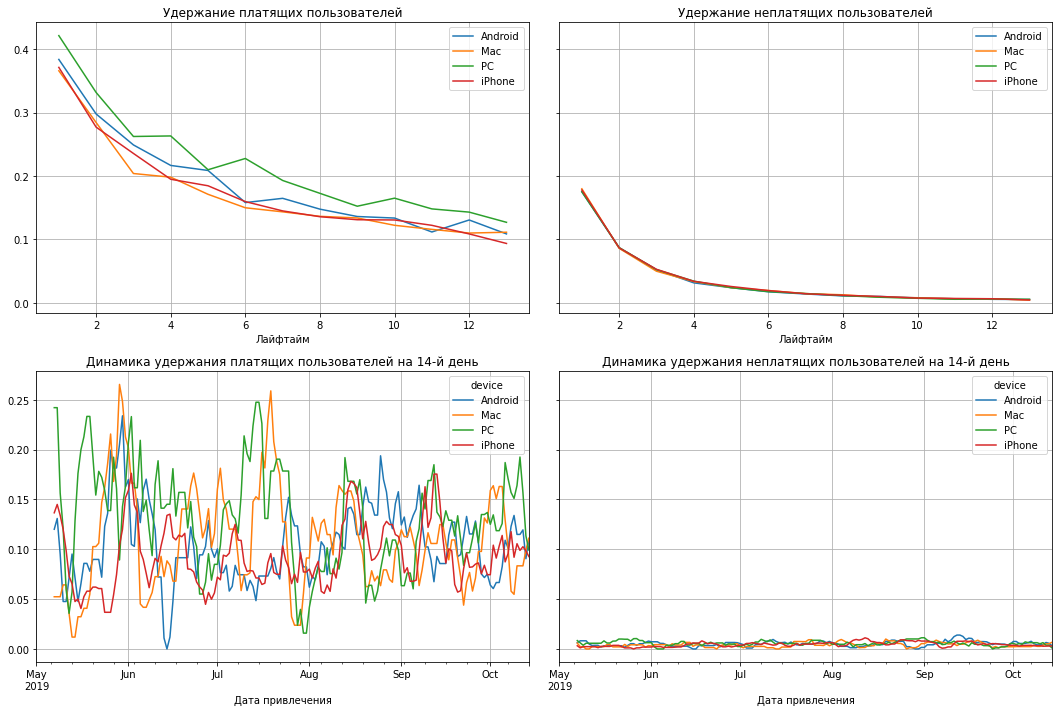

In [ ]:
plot_retention(retention_grouped, retention_in_time, horizon, window=7) #визуализация удержания

От устройства к устройству удержание не отличается друг от друга. Удержание после 5го дня несколько выше всех других устройств для iPhone. От 1го до 14го дня падает в среденм с 40 до 12 % для платящих клиентов. Удержание неплатящих клиентов ниже. Динамика удержания на 14й день стабильна в наблюдаемый период для клиентов входящих на любых устройствах. Динамика неплатящих клиентов на 14 день блиска к нулю. На 14й день все неплатящие отваливаются.

In [ ]:
result_raw, result_grouped, result_in_time = get_conversion(
    profiles,
    orders,
    datetime(2019, 11, 27).date(),
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)
# Конверсия

In [ ]:
conversion = result_grouped
conversion_history = result_in_time
horizon = horizon_days

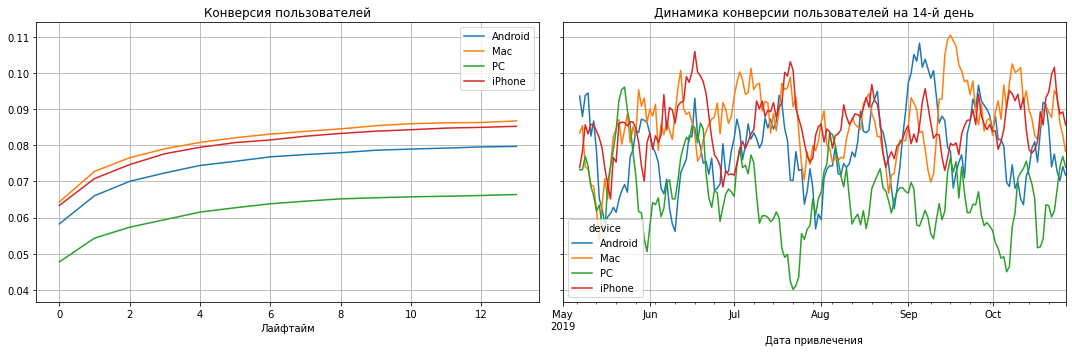

In [ ]:
plot_conversion(conversion, conversion_history, horizon, window=7)

Графики конверсии для разных устройств за 14 дней кажутся паралельными находящимся друг над другом. Снизу вверх:
- iPhone c 5 процента до 6,5 %;
- Android c 6 процента до 8 %;
- Mac и PC c 6,5 процента до 8,5 %

Насыщения графики достигают на 8-10 день на всех устройствах

Динамика с мая по оетябрь практически не поменялась для устроств.

Проанализируем полученные графики:

Графики получены для всех клиентов приложения Procrastinate Pro+ с разбивкой по устройствам, с которых был осуществлен вход в это приложение.
Проанализируем полученные графики:

LTV - пожизненая ценность клиента в течении первых 14 дней равномерно растет для клиентов вошедших на всех устройствах с 0,2 до 0,7. Однако линии и ценности распределились следующим образом:

- ниже всех владельцы iPhone за 14 дней стоимость клиента растет меньше всего;
- несколько выше на 0,1 владельцы Android. Средний рост стоимости;
- и еще чуть выше на 0.05 практически сливаясь обладатели PC  и Mac - самый большой рост стоимости.

Спускаясь графиком ниже обнаруживаем, что только владельцы PC за 14 дней приодалевают уровень 1, то есть приносят денег больше, чем затрачено на их привлечение. Владельцы трех других устройст для приложения Procrastinate Pro+ убыточны.

В динамиках LTV и ROI все как обычно. Особого внимания требует описание динамики стоимости привлечения:

- в начале исследуемого периода стоимость привлечения клиента была невысокой около 0,3 и практически одинаковой для всех устройств;
- за полгода с мая по октябрь стоимость выросла причем неравномерно:
- меньше всего для владельцев iPhone до 0,6;
- чуть выше для владельцев Android до 0,8;
- самый большой рост для владельцев PC и Mac до 1,0

Вложения в рекламу относительно модели устройства окупаются в настоящее время только для PC и Android, причем для PC окупается на 7 день, а для Android на 11.

Удержание и конверсия для всех клиентов практически одинакова для всех устройств входа. Несколько ниже конверсия у iPhone.

#### исследование с группировкой по странам

Подолжая исследованич проанализируем окупаемость рекламы с разбивкой по странам. Также построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [ ]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    datetime(2019, 11, 27).date(),
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)

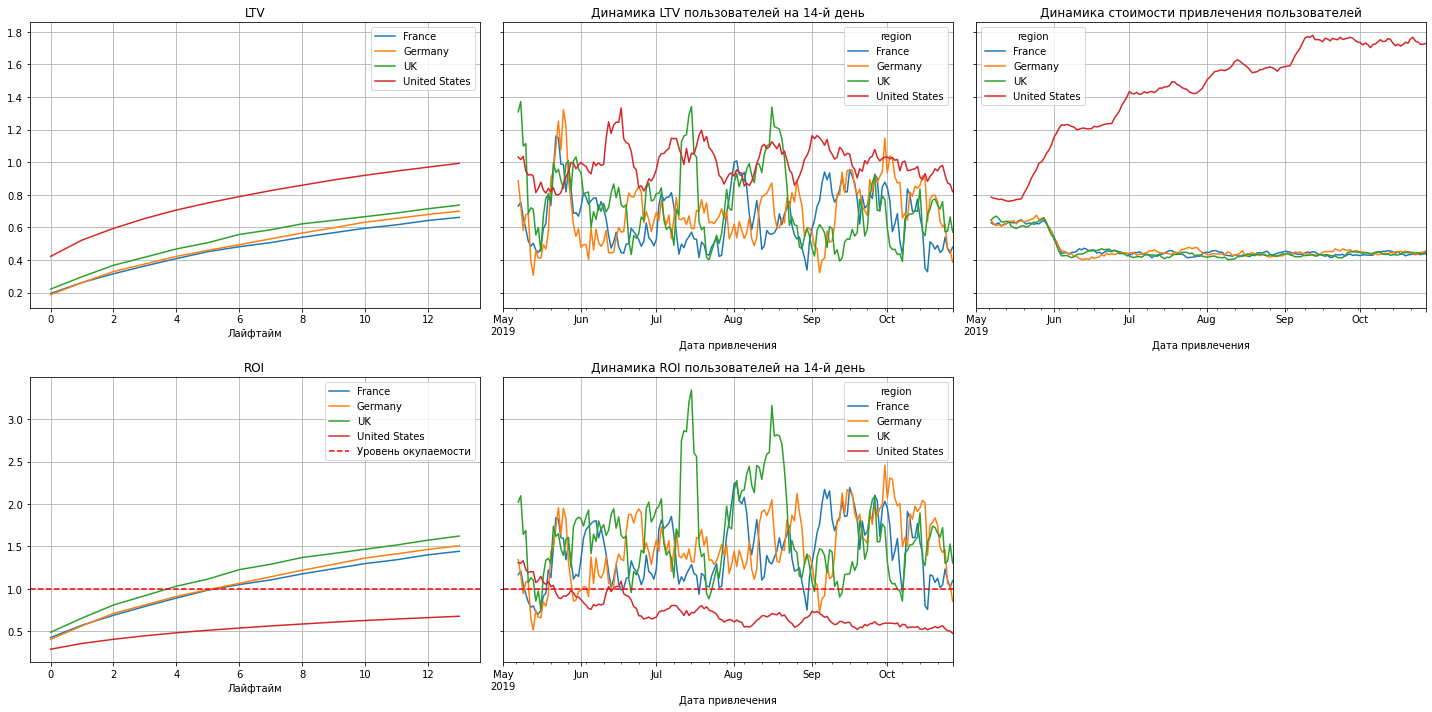

In [ ]:
horizon = horizon_days
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7)

Дополнительно рассмотрим ***конверсию*** и ***удержание*** клинтов из разных стран. Возможно это сформирует рекомендации для отдела маркетинга.

In [ ]:
retention_raw, retention_grouped, retention_in_time =get_retention(
    profiles,
    visits,
    datetime(2019, 10, 27).date(),
    14,
    dimensions=['region'],
    ignore_horizon=False,
)
# удержание

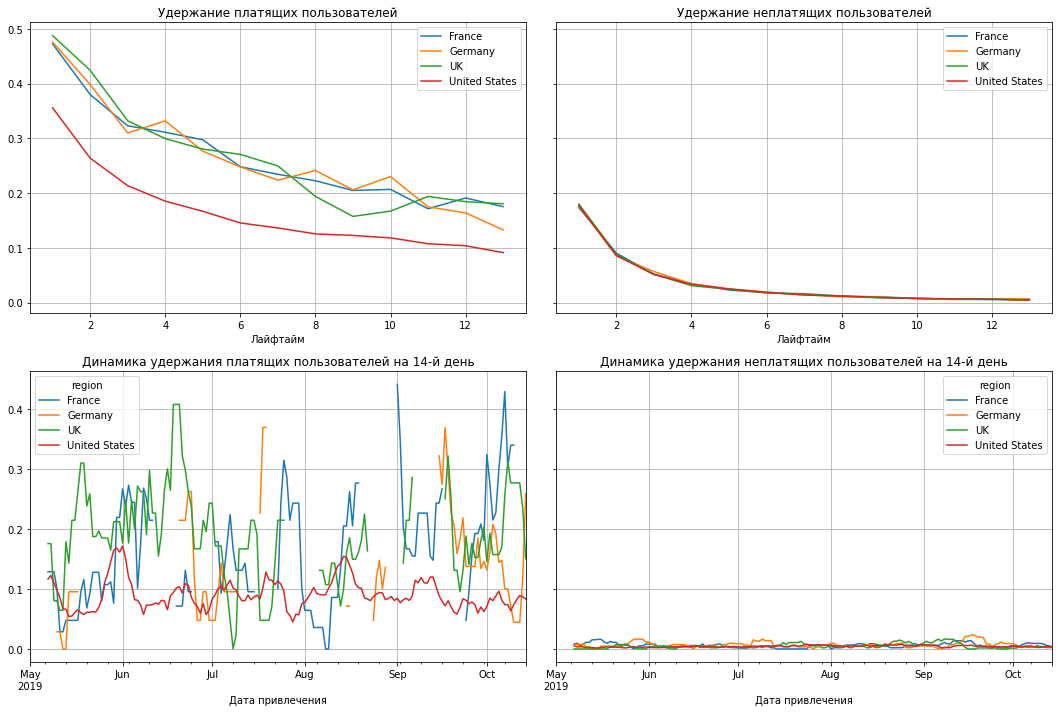

In [ ]:
plot_retention(retention_grouped, retention_in_time, horizon, window=7) #визуализация удержания

In [ ]:
result_raw, result_grouped, result_in_time = get_conversion(
    profiles,
    orders,
    datetime(2019, 11, 27).date(),
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)
# Конверсия

In [ ]:
conversion = result_grouped
conversion_history = result_in_time
horizon = horizon_days

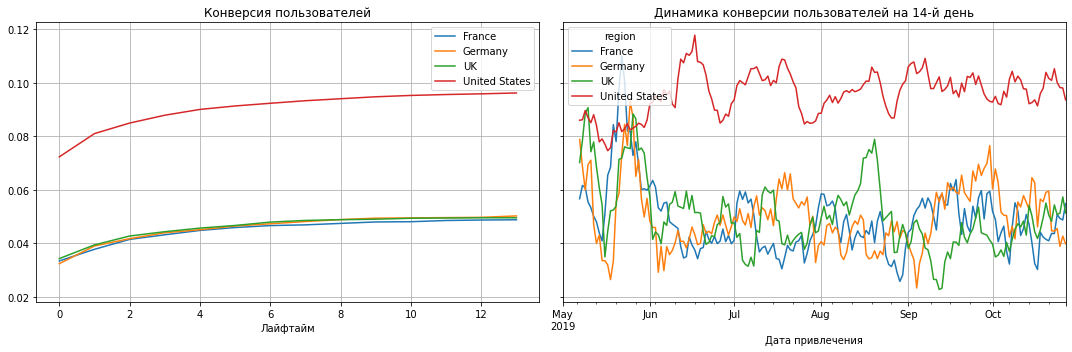

In [ ]:
plot_conversion(conversion, conversion_history, horizon, window=7)

Формы кривых динамики удержания и конверсии от региона к региону неизменна. На этих графиках интересны уровни этих параметров:

- удержание в США ниже, чем в европейских странах 38% в первый день и равномерное падение до 10 процентов на 14й;
- удержание в европйских странах практически одинаково и выше на всем промежутке с 1го до 14 дня от 50% до 20ти.

Конверсия пользователей тоже отличается *уровнем* в США и европейских странах:
- равноменрный рост от 5% до 6,5% в США;
- и такой же рост на более низком уровне с 2,5% до 4%
- несколько ниже конверсия во France.

***Анализ  полученных графиков:***

Графики получены для всех клиентов приложения Procrastinate Pro+ с разбивкой по странам, из которых был осуществлен вход в это приложение.

LTV - пожизненая ценность клиента в течении первых 14 дней равномерно растет для клиентов вошедших из всех стран с 0,4 до 1 для US и с 0,2 до 0,7 для других стран. Несколько ниже всех расположена линия LTV для France.

Интересно рассмотрение ROI с разбивкой по странам:
- клиенты, привлеченные из всех стран окупаются на 4-6 день за исключением клинтов из US
- клиенты из USA стоят дороже, чем приносят выручку.

Ответ на это противоречие таится в соседнем и верхнем правом графике:
- в рассматриваемый период динамика стоимости привлечения пользователей для USA оторвалась от других стран от стоимости 0,4-0,6 и устремилась к отмтке 1,8;
- как результат начиная с середины июня ROI на 14 день для USA не поднимался выше 1, что говорит о том, что на привлечение клиента приложение Procrastinate Pro+ тратит больше, чем этот клиент приносит выручки.
- для других стран все как обычно.

Конверсии и удержания для всех стран равномерны и отличаются уровнем:

- Конверсия в США выше европейской;
- Удержание в США ниже, чем в европейских странах.

#### исследование с группировкой по рекламным источникам

Вот мы добрались до самого интересного. Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [ ]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    datetime(2019, 11, 27).date(),
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)

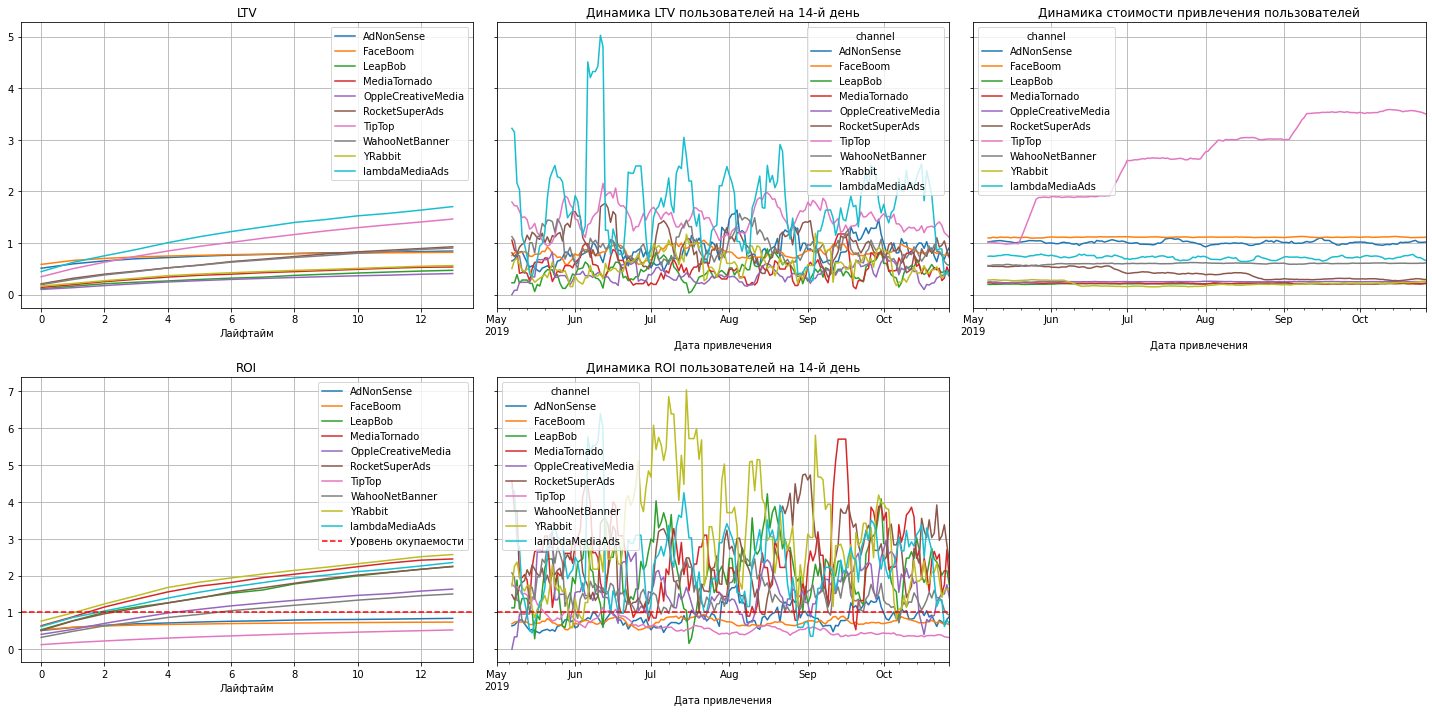

In [ ]:
horizon = horizon_days
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7)

Разобраться в такой мешанине графиков будет затруднительно, поэтому возможно нужны будут некоторые вычисления и построения:

выведем покрупнее 1й график LTV

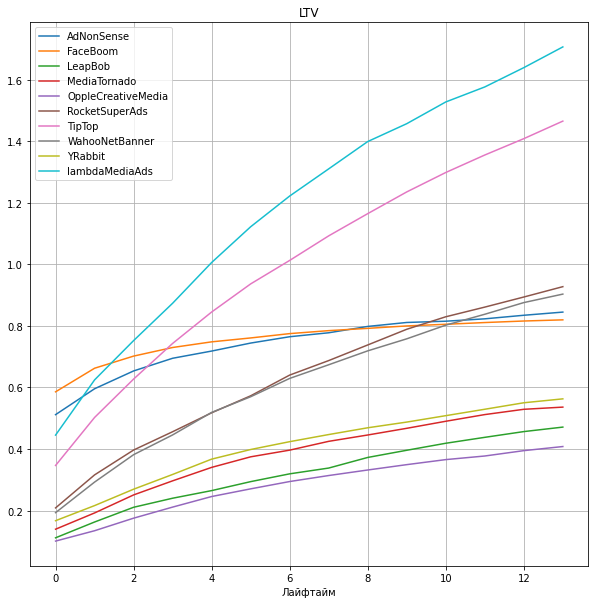

In [ ]:
ltv1 = ltv.drop('cohort_size', axis=1)
ltv1.T.plot(grid=True, figsize=( 10 , 10))
plt.legend()
plt.xlabel('Лайфтайм')
plt.title('LTV');

In [ ]:
ltv

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
AdNonSense,3880,0.511441,0.595559,0.653436,0.694593,0.718000,0.743987,0.764564,0.777425,0.798010,0.810871,0.814987,0.822704,0.834278,0.844575
FaceBoom,29144,0.585567,0.662215,0.701634,0.729580,0.747938,0.760609,0.774683,0.784343,0.791741,0.799653,0.804996,0.810646,0.815615,0.819381
LeapBob,8553,0.111338,0.162683,0.210524,0.239930,0.264667,0.293840,0.319161,0.337948,0.372392,0.395729,0.418484,0.437738,0.456407,0.470993
MediaTornado,4364,0.139283,0.192113,0.250660,0.296418,0.340126,0.374432,0.396157,0.424746,0.445332,0.467058,0.489929,0.511654,0.528806,0.535898
OppleCreativeMedia,8605,0.100672,0.134310,0.175146,0.211106,0.245447,0.270382,0.294159,0.313644,0.331632,0.349030,0.365383,0.377097,0.394504,0.407842
RocketSuperAds,4448,0.208473,0.315746,0.396520,0.455978,0.517457,0.572653,0.639987,0.687107,0.737835,0.788779,0.829391,0.860805,0.893566,0.927221
TipTop,19561,0.346362,0.502300,0.627011,0.742794,0.844849,0.936186,1.012470,1.092276,1.164429,1.234998,1.298113,1.354899,1.408020,1.465012
WahooNetBanner,8553,0.193020,0.292347,0.381392,0.445572,0.518738,0.569615,0.629163,0.673503,0.718665,0.757756,0.802213,0.837569,0.875496,0.903035
YRabbit,4312,0.166920,0.215990,0.269244,0.317157,0.366941,0.398186,0.423646,0.446793,0.468780,0.487296,0.508126,0.528961,0.550023,0.562753


Так видно получше. Можно делать какие-то выводы.

Как мы помним большие платежи были в канал привлечения FaceBoom и нарастающие платежи в канал TipTop. Посмотрим много ли денег принесли клиенты, пришедшие из этих каналов:
- FaceBoom приносит самый высокий доход в первый день - 0,6;
- а затем очень быстро сдувается достигая насыщения на уровне - 0,8;
- также себя ведут клиенты привлеченные рекламой AdNonSense	- высокий уровень в первый день и бысторе затухание к 15му дню;
- другая история с TipTop. Тоже с достаточно высокой планки 0,34 первого дня клиенты, пришедшие из этого канала начинают взрывно платить и не останавливаются даже на 14 день, демонстрируя рост выручки;
- Такую же взрывную реакцию выручки демонстрируют клиенты привлеченные из lambdaMediaAds;
- Еще два перспективных канала с поведением клиентов похожих на lambdaMediaAds - RocketSuperAds	и WahooNetBanner на 15й день после привлечения показывают положительную динамику прироста выручки.

Посмотрим покрупнее, окупаются ли вложения в рекламу для этих и других каналов. Итак, ROI (крупно)

In [ ]:
roi

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,,
AdNonSense,3880,1.008054,0.507354,0.590801,0.648215,0.689043,0.712263,0.738043,0.758456,0.771214,0.791634,0.804392,0.808476,0.816130,0.827613,0.837827
FaceBoom,29144,1.113286,0.525981,0.594829,0.630237,0.655339,0.671829,0.683211,0.695853,0.704530,0.711175,0.718282,0.723081,0.728156,0.732619,0.736003
LeapBob,8553,0.210172,0.529745,0.774049,1.001674,1.141589,1.259290,1.398092,1.518569,1.607961,1.771846,1.882883,1.991149,2.082760,2.171590,2.240988
MediaTornado,4364,0.218717,0.636818,0.878363,1.146048,1.355262,1.555098,1.711948,1.811279,1.941989,2.036114,2.135445,2.240016,2.339347,2.417767,2.450193
OppleCreativeMedia,8605,0.250000,0.402687,0.537241,0.700583,0.844425,0.981787,1.081529,1.176637,1.254578,1.326526,1.396119,1.461532,1.508388,1.578017,1.631368
RocketSuperAds,4448,0.412095,0.505887,0.766197,0.962204,1.106487,1.255674,1.389613,1.553006,1.667349,1.790447,1.914070,2.012619,2.088849,2.168347,2.250016
TipTop,19561,2.799003,0.123745,0.179457,0.224012,0.265378,0.301839,0.334471,0.361725,0.390237,0.416016,0.441228,0.463777,0.484065,0.503043,0.523405
WahooNetBanner,8553,0.602245,0.320501,0.485428,0.633285,0.739852,0.861341,0.945820,1.044696,1.118321,1.193310,1.258220,1.332038,1.390745,1.453722,1.499449
YRabbit,4312,0.218975,0.762280,0.986370,1.229565,1.448370,1.675722,1.818411,1.934676,2.040383,2.140793,2.225350,2.320476,2.415623,2.511809,2.569941


In [ ]:
roi1 = roi.drop('cohort_size', axis=1)
roi1 = roi1.drop('cac', axis=1)

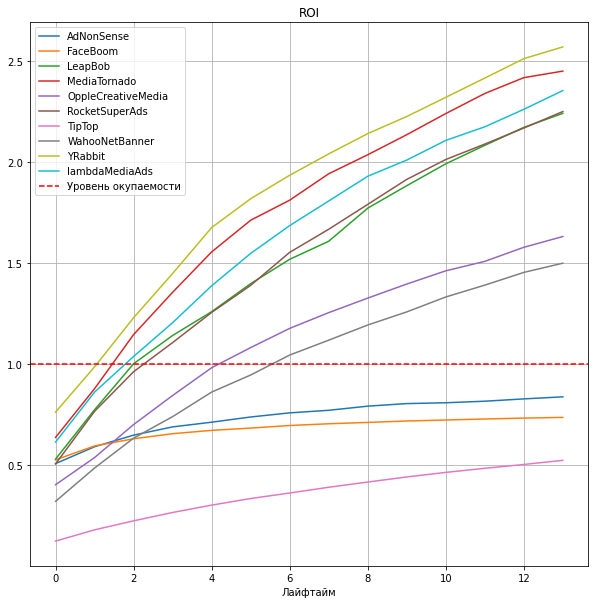

In [ ]:
roi1.T.plot(grid=True, figsize=( 10 , 10))
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.xlabel('Лайфтайм')
plt.title('ROI');

На этом графике уже что-то видно и можно сделать некоторые выводы:
- определим три канала привлечение из которых не дает экономического эфекта - стоимость привлечения привышает выручку от клиентов: AdNonSense, FaceBoom, TipTop. (Намечаются интересные рекомендации отделу маркетинга приложения Procrastinate Pro+)
- теперь пятерка лидеров - выручка от клиентов уже на второй день привысила вложения на привлечение: LeapBob, MediaTornado, RocketSuperAds, YRabbit, lambdaMediaAds.
- два оставшихся канала ведут себя обычно - выходят в плюс на 4-5 день.

Посмотрим на причины, откуда такое могло получиться.
График покрупнее "Динамика стоимости привлеченных пользователей" даст ответ на этот вопрос.

In [ ]:
cac_history = roi_history[['cac']]

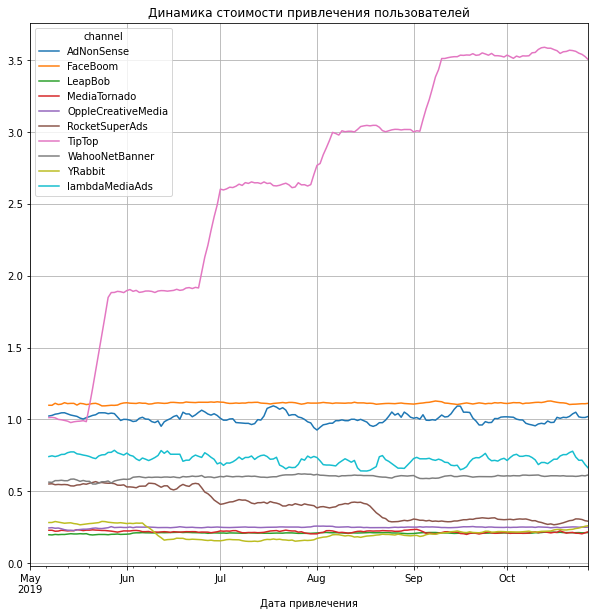

In [ ]:
# третий график — динамика cac
# столбцами сводной таблицы станут все столбцы индекса, кроме даты
columns = [name for name in cac_history.index.names if name not in ['dt']]
filtered_data = cac_history.pivot_table(
    index='dt', columns=columns, values='cac', aggfunc='mean'
)
filter_data(filtered_data, window =7).plot(grid=True, figsize=( 10 , 10))
plt.xlabel('Дата привлечения')
plt.title('Динамика стоимости привлечения пользователей');

In [ ]:
cac_history.groupby('channel').agg(['sum', 'first', 'last', 'mean']) #.sort_values(by = [mean], ascending=False)

cac                              
                           sum     first      last      mean
channel                                                     
AdNonSense          181.884087  1.050000  1.020000  1.010467
FaceBoom            200.315533  1.089423  1.126570  1.112864
LeapBob              37.699700  0.210000  0.220862  0.209443
MediaTornado         39.364578  0.240000  0.217143  0.218692
OppleCreativeMedia   44.878848  0.236111  0.257246  0.249327
RocketSuperAds       73.194141  0.540000  0.287857  0.406634
TipTop              478.007889  0.975610  3.458824  2.655599
WahooNetBanner      107.880557  0.568421  0.626866  0.599336
YRabbit              38.014890  0.289286  0.251591  0.211194
lambdaMediaAds      129.785214  0.765217  0.631579  0.721029

Даже на крупном графике трудно что-либо разглядеть. Призовем на помощь цифры:

Начинаем анализировать снизу вверх.


- нижняя группа очень ровная, практически не получающие финансирования каналы:LeapBob, MediaTornado, OppleCreativeMedia, YRabbit. За полгода в каждый из этих каналов продвижения менеджерами отдела маркетинга было израсходовано 30-40.
- следующая группа. А в этой группе 1 канал - RocketSuperAds. За отчетный период уменьшил стоимость привлечения с 0.54 до 0.287857. Напоминаю, что RocketSuperAds - один из перспективных каналов имеющих взрывную выручку, клиенты от которого на второй день платят больше чем вложено рекламы. А менеджеры отдела маркетинга снижают вложения в этот канал!
- далее ровные по времени на разных (от 0,5 до 1,0) уровнях WahooNetBanner, lambdaMediaAds, AdNonSense. Первые два имеют взрывной характер привлечения клиентов, AdNonSense - убыточен.
- отдельным абзацем отмечаем ошибки финансирования - FaceBoom и TipTop. Самые болшие вложения - самый маленький результат. Выручка от привлеченных через эти каналы клиентов не покрывает затрат на рекламу.

Рассмотрим отдельно TipTop:

In [ ]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles.query('channel=="TipTop"'),
    orders,
    datetime(2019, 11, 27).date(),
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)

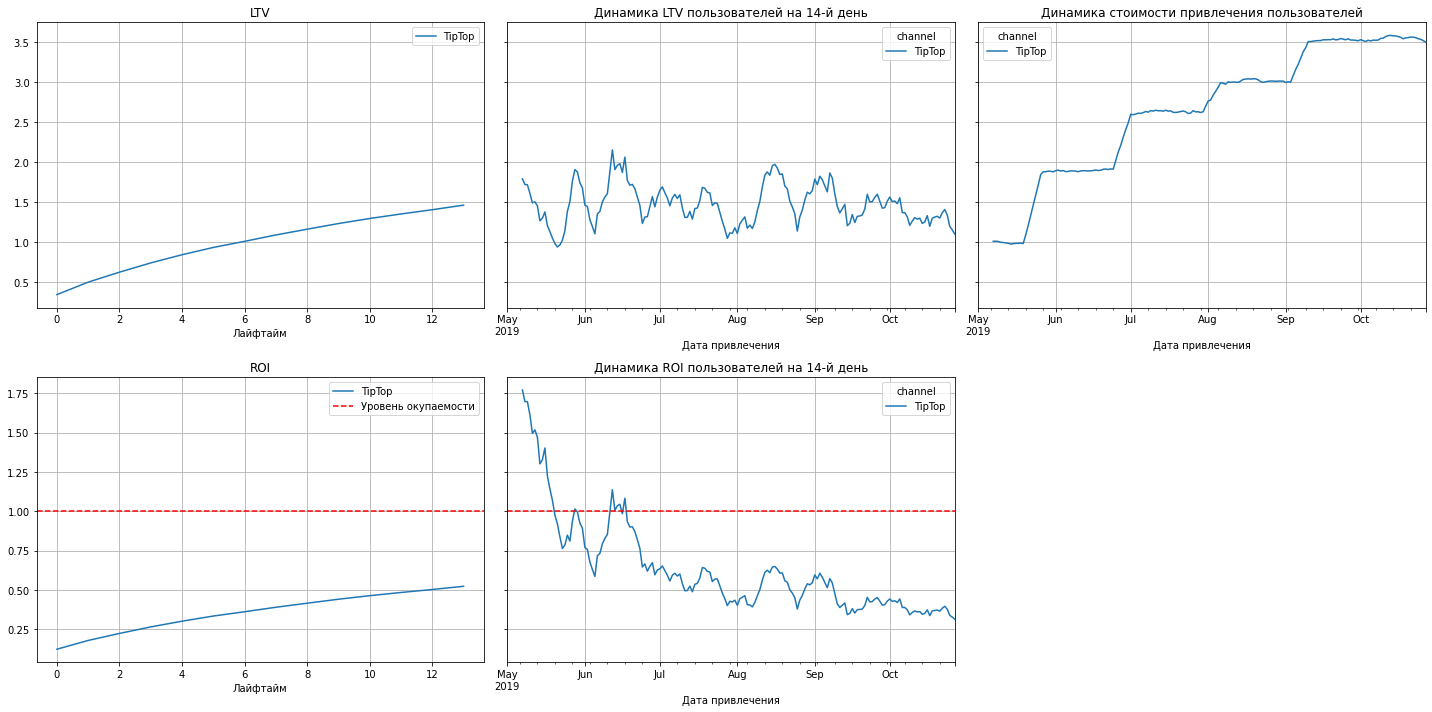

In [ ]:
horizon = horizon_days
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7)

Обращает на себя внимание, что в начале периода до середины июня, когда еще не начались "безумные" платежи в этот канал, а стоимость привлечения не привышала 2,0, ROI был больше 1, а вначале периода около 1,75!

Проанализируем удержание и конверсию для различных каналов рекламы, особенно для тех которые будем рекомендовать или отговаривать к использованию отдел маркетинга приложения Procrastinate Pro+

In [ ]:
retention_raw, retention_grouped, retention_in_time =get_retention(
    profiles,
    visits,
    datetime(2019, 10, 27).date(),
    14,
    dimensions=['channel'],
    ignore_horizon=False,
)
# удержание

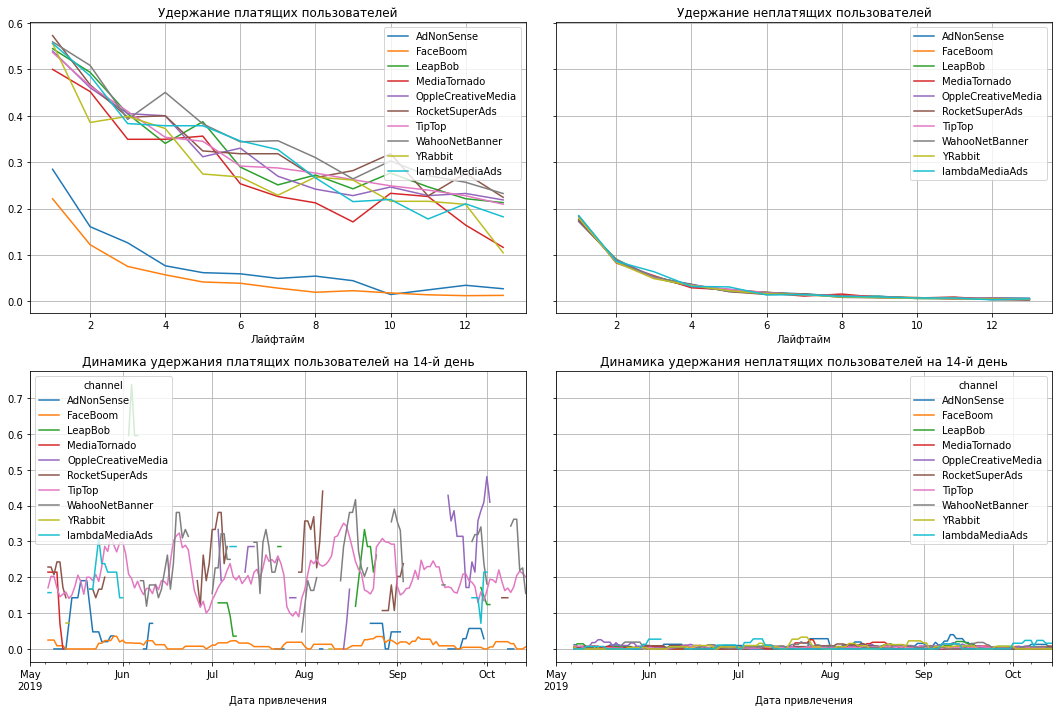

In [ ]:
plot_retention(retention_grouped, retention_in_time, horizon, window=7) #визуализация удержания

Кривые удержания платящих клиентов для всех источников привлечения кроме  AdNonSense, FaceBoom выглядят одинаково и падают равномерно с 55% до 20%. Отдельно сильно ниже по уровню удержания проходят 2е кривые - AdNonSense, FaceBoom. обращает на себя внимание тот факт, что, если AdNonSense практически не финансируется, то FaceBoom в рассматриваемый период финансировался в приоритетном порядке. Кривые неплатящих клинтов ниже.

Рассмотрим отдельно еще одного лидера финансирования в этот период - TipTop:

In [ ]:
retention_raw, retention_grouped, retention_in_time =get_retention(
    profiles.query('channel == "TipTop"'),
    visits,
    datetime(2019, 10, 27).date(),
    14,
    dimensions=['channel'],
    ignore_horizon=False,
)
# удержание

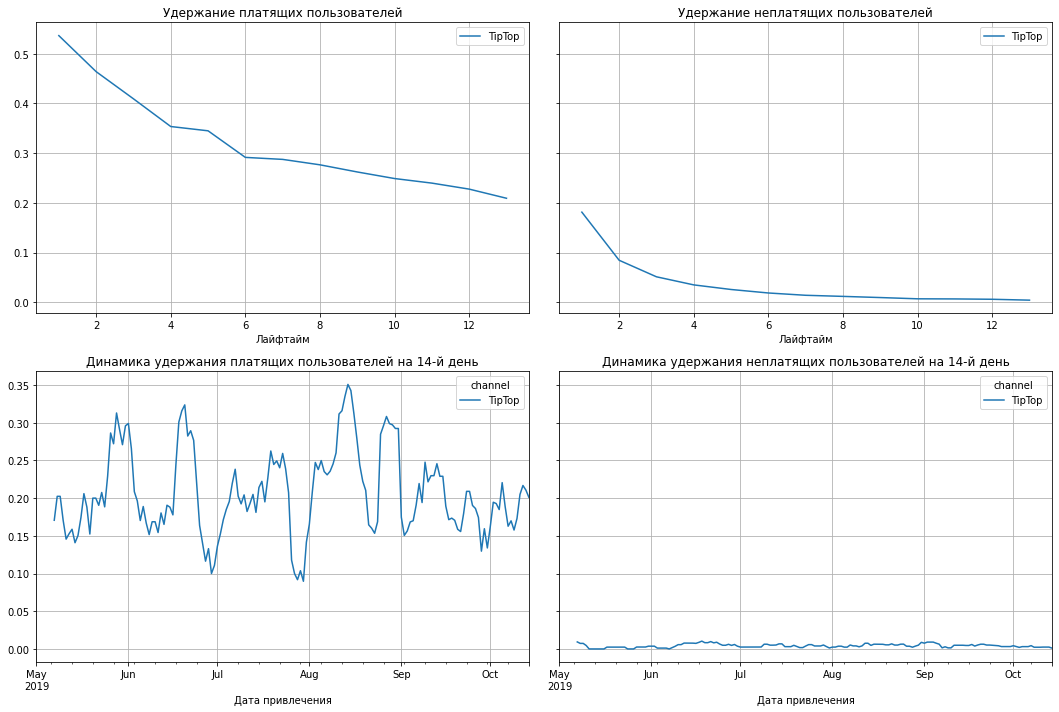

In [ ]:
plot_retention(retention_grouped, retention_in_time, horizon, window=7) #визуализация удержания

С точки зрения удержания источник привлечения клинтов TipTop ведет себя нормально, и если забыть на минуту сколько денег влито в рекламу, то обычные цифры удержания 0,52 в первый день и 0,21 в 14й кажутся вполне приличными.

Рассмотрим повнимательнее еще несколько, кажущихся перспективными каналов, финансироваемых по остаточному принципу - WahooNetBanner, lambdaMediaAds, RocketSuperAds.

Рассмотрим отдельно еще одного лидера финансирования в этот период - FaceBoom и на этом же поле AdNonSense:

In [ ]:
retention_raw, retention_grouped, retention_in_time =get_retention(
    profiles.query('channel == "FaceBoom" or channel == "AdNonSense"'),
    visits,
    datetime(2019, 10, 27).date(),
    14,
    dimensions=['channel'],
    ignore_horizon=False,
)
# удержание

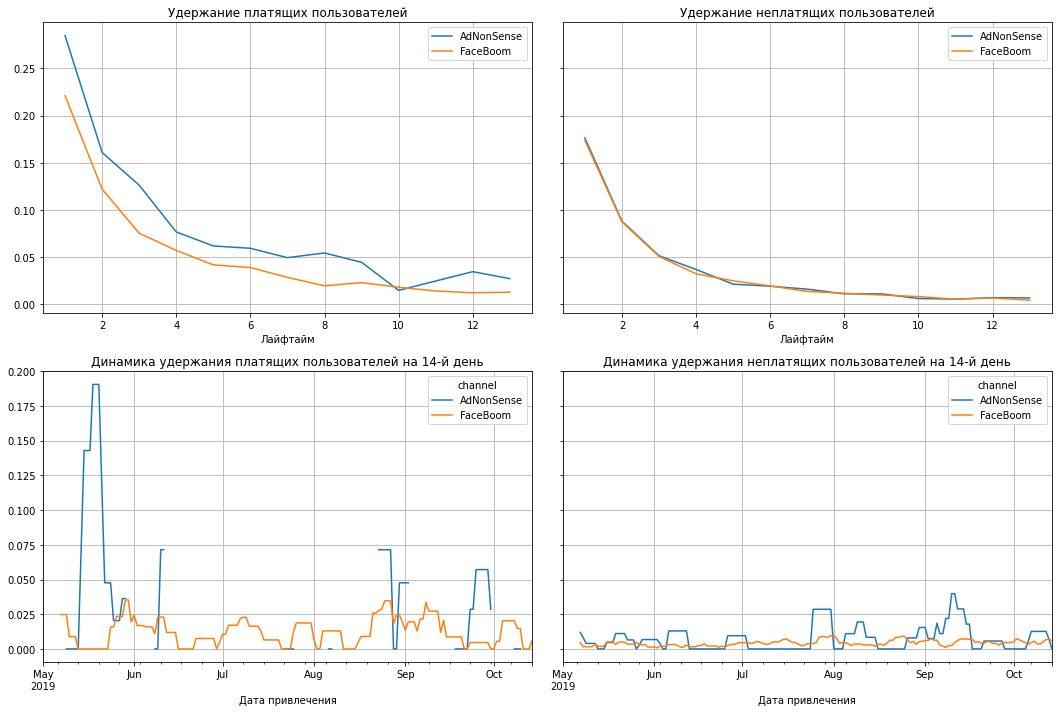

In [ ]:
plot_retention(retention_grouped, retention_in_time, horizon, window=7) #визуализация удержания

Анализируя графики можно заметить, что клиенты пришедшие из этих каналов очень похожи:

- на общем графике видно продажи в 1й день - 0.2 - 025;
- уточняя на графике отдельно для этих двух каналов видны потери активности клиентов в первые 4 дня;
- совсем низкое удержание на 14 день;
- для FaceBoom в некоторые моменты исследуеммого периода на графике динамики удержания видно удержание либо нулевое, либо близкое к нулю, не смотря на постоянное финансирование.

In [ ]:
retention_raw, retention_grouped, retention_in_time =get_retention(
    profiles.query('channel == "WahooNetBanner" or channel == "lambdaMediaAds" or channel == "RocketSuperAds"'),
    visits,
    datetime(2019, 10, 27).date(),
    14,
    dimensions=['channel'],
    ignore_horizon=False,
)
# удержание

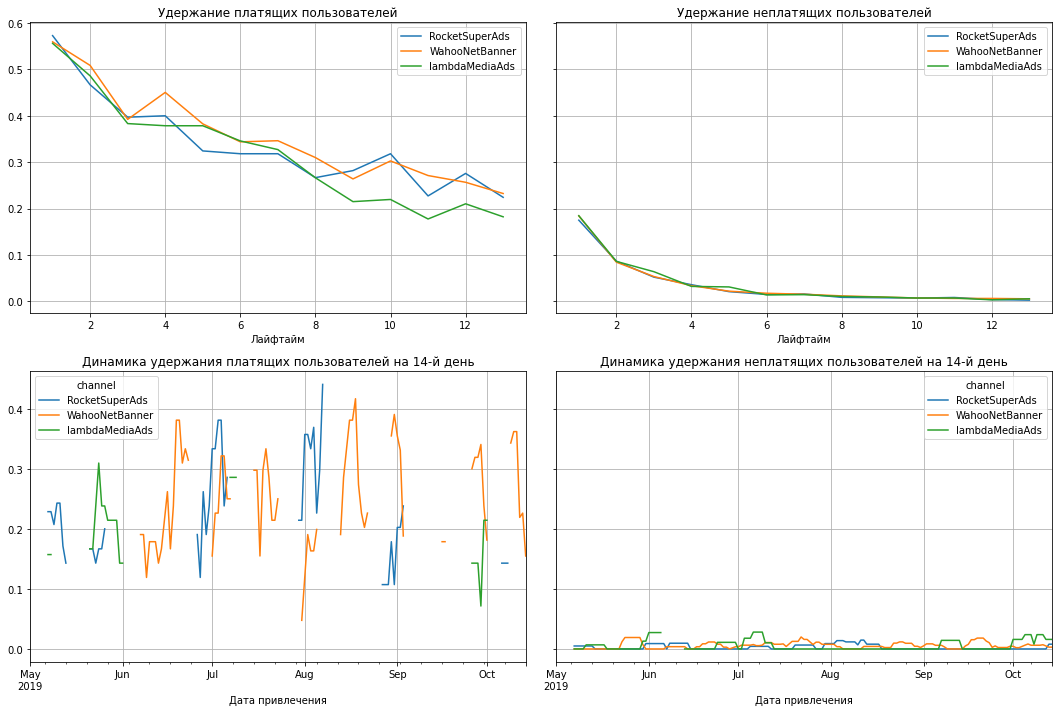

In [ ]:
plot_retention(retention_grouped, retention_in_time, horizon, window=7) #визуализация удержания

Когда небольшие и нерегулярные деньги платились за рекламу в этих каналах удержание клиентов пришедших от туда соизмеримо, а где-то даже лучше TipTop, залитого деньгами.

Посмотрим конверсию:

In [ ]:
result_raw, result_grouped, result_in_time = get_conversion(
    profiles,
    orders,
    datetime(2019, 11, 27).date(),
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)
# Конверсия

In [ ]:
conversion = result_grouped
conversion_history = result_in_time

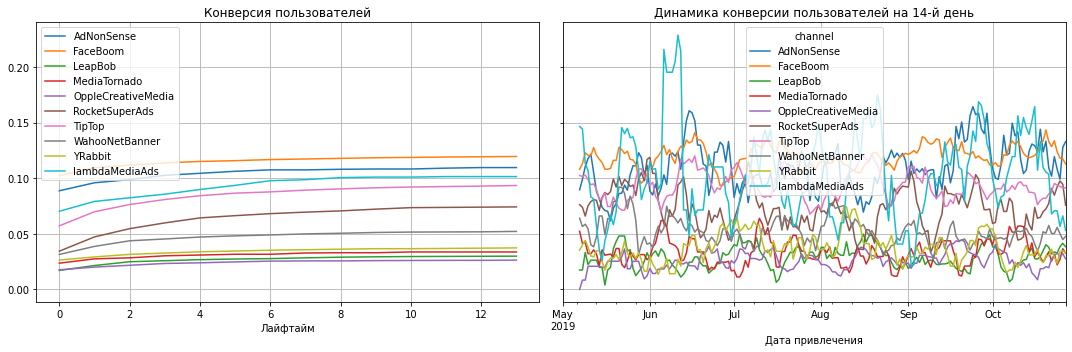

In [ ]:
plot_conversion(conversion, conversion_history, horizon, window=7)

На графике видно, что конверсия для большинства каналов очень плохая. посмотрим в таблице, что находиться в верней части:

In [ ]:
conversion.sort_values([0])

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
LeapBob,8553,0.017070,0.021513,0.024904,0.025839,0.026774,0.027359,0.027710,0.028411,0.028996,0.029346,0.029580,0.029697,0.029814,0.029931
OppleCreativeMedia,8605,0.017664,0.020105,0.021732,0.023359,0.023940,0.024753,0.025450,0.025683,0.025683,0.025915,0.026031,0.026148,0.026148,0.026380
MediaTornado,4364,0.023602,0.027498,0.028414,0.030247,0.030935,0.031622,0.031622,0.032768,0.032997,0.032997,0.033685,0.033685,0.033685,0.033685
YRabbit,4312,0.026438,0.029221,0.031540,0.032699,0.033859,0.034555,0.035250,0.035714,0.036178,0.036642,0.036642,0.036874,0.037106,0.037338
WahooNetBanner,8553,0.031451,0.038700,0.043727,0.045364,0.047118,0.048170,0.048989,0.049924,0.050509,0.051210,0.051561,0.051678,0.051795,0.052145
RocketSuperAds,4448,0.034397,0.047212,0.054631,0.059802,0.064299,0.066322,0.068121,0.069469,0.070594,0.072167,0.073516,0.073741,0.073966,0.074191
TipTop,19561,0.057155,0.069833,0.076325,0.080824,0.084249,0.086550,0.087674,0.089259,0.090384,0.091355,0.092071,0.092480,0.092889,0.093400
lambdaMediaAds,2149,0.070265,0.079107,0.082364,0.085621,0.089809,0.093532,0.097720,0.098651,0.100512,0.100977,0.100977,0.101443,0.101443,0.101443
AdNonSense,3880,0.088660,0.095876,0.098711,0.102577,0.104381,0.106186,0.107474,0.107474,0.107990,0.108247,0.108247,0.109021,0.109536,0.109536


Проанализируем линии конверсии, находящиеся в верхней части графика, так как линии от каналов аусайдеров по конверсии сливаются в своем единообразии на очень низком уровне от 1% до 2-3% на 14 день.

В верхней части FaceBoom со значениями 10% в первый день привлечения до 12% в 14й день. Если бы не самая большая кагорта, то это был бы весьма скромный результат, при условии второго места по финансированию в изучаемый период. Также надо напомнить, что это один из каналов с ROI  меньше 1.
Затем AdNonSense с 8% до 11%, но вспомним, что при небольшом финансировании это один из каналов, который тоже не окупается.

Для клиентов пришедших с FaceBoom и AdNonSense характерно низкое удержание, а самое главное быстрая потеря этого невысокого удержания в первые дни. К 14му дню для клиентов обоих этих каналов характерно удержание близкое к нулю.

lambdaMediaAds - один из возможных недооцениных лидеров. При небольшой кагорте и практически отсутствии финансирования конверсия изменяется с 7% до 10% за 14 дней.

Следующий TipTop - вторая по величине кагорта, конверсия с 5,5% в первый день до 9,5% в 14й. Жаль что очень доргая реклама. Стоимость привлечения, напоминаю, привышает выручку привлеченных клиентов.

Далее недооцененная группа RocketSuperAds, WahooNetBanner, MediaTornado приращивает конверсию с 2-3 до 4-5 %% при малом финансировании и взрывном характере ROI, окупающиеся уже на второй день.

**Выводы по разделу "Окупаемость рекламы"**

Из-за ошибок финансирования каналов продвижения реклама в приложения Procrastinate Pro+ не окупается - выручка от клиентов на 14 день меньше денег истраченных на привлечение этих клиентов.

\
С точки зрения стран, самые дорогие клиенты это клиенты из США. Затраты на рекламу с США не окупают себя. Не смотря, что рынок США самый большой для Procrastinate Pro+ и там большая доля платящих клиентов, все же затраты на привлечение привышают выручку от этих клиентов. Здесь происходит такая история - выручка от клиентов других стран идет на финансирование рекламы в США. Конверсии и удержания для всех стран равномерны и отличаются уровнем, конверсия в США выше европейской.

\
Не все устройства входа для приложения Procrastinate Pro+ выгодны. Клиенты входящие с iPhone и Mac платят меньше, чем затрачено на их привлечение. Хотя для меня это лично спорно, я не знаю чем отличается приложение для iPhone и Android и как различить рекламу прочитанную на разных платформах PC и Mac например. Удержание и конверсия для всех клиентов практически одинакова для всех устройств входа. Несколько ниже конверсия у iPhone.

\
Самые большие ошибки отдела маркетинга приложения Procrastinate Pro+ связаны с неверным выбором каналов продвижения. за отчетный период тратились большие деньги на каналы, которыые не преносили достаточного количества клиентов для компенсации затрат на рекламу и получения дополнительного дохода. И наоборот, каналы имеющие взрывную ROI, окупающие вложения в рекламу уже на 2й-3й день финансировались очень мало.

### Выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**ОБЩИЕ ВЫВОДА ПО ВСЕМУ ПРОЕКТУ**

В проекте рассматривались отчеты за полгода развлекательного приложения Procrastinate Pro+. На основании трех датасетов предлагалось разобраться, почему, несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.

В результате выполнения работы были выполнены следующие работы:
- Поддготовлены данные для анализа;
- Адоптированы под реальные работы учебные функции расчета маркетинговых параметров;
- Проведен исследовательский анализ данных;
- Выполнены маркетинговые исследования.

Выявлено:

1. Затраты на рекламу в США превышают выручку клиентов првлеченой этой рекламой.
2. Замечено ежемесячное повышение оплат в канал TipTop. За отчетный период в рекламу канала вложено больше всего денег, не смотря на это TipTop остается одним из каналов затраты на который привышают выручку от клиентов привлеченных через этот канал.
3. Обращает на себя внимание, что в начале периода до середины июня, когда еще не начались "безумные" платежи в этот канал, а стоимость привлечения не привышала 2,0, ROI был больше 1.
4. Канал FaceBoom имеет второе место по финансированию рекламы, но в изучаемый период показал ROI меньше 1. Конверсия канала - самая высокая, но быстро насыщается и со второго дня практически не растет. Удержание быстро падает в первые дни, а к 14 дню практически сходит на нет. Клиенов, пришедших по рекламе с FaceBoom даже для большой кагорты  недостаточно, чтобы окупить затраты на рекламу. Динамика стоимости привлечения пользователей стабильна на всем периоде анализа и равна 1,1, что выше, чем выручка этих пользователей.
5. Канал AdNonSense убыточен при малом финансировании. Поведение клиентов пришедших из этого канала: Конверсия канала быстро насыщаетсяи со второго дня практически не растет. Удержание быстро падает в первые дни, а к 14 дню практически сходит на нет. И даже при незначительном и нерегулярном финансировании рекламы на этом канале привлеченные клиенты не окупают затраты на рекламу.
6. Каналы RocketSuperAds, WahooNetBanner, MediaTornado при малом и нерегулярном финансировании тем не менее имеют высокое ROI и окупаются на 2й - 3й день при высоком 0,6 удержании.
7. Реклама прочитанная на устройствах Mac И iPhone не окупается.

Результатом маркетингового анализа явились рекомендации отделу маркетинга по вопросу рекламы:

1. Уменьшить рекламу через каналы FaceBoom и TipTop, так как в настоящее время затраты на эту рекламу привышают платежи привлеченнных клиентов.
2. Рассмотреть и увеличить финансирование наиболее перспективных каналов рекламы  MediaTornado, RocketSuperAds, lambdaMediaAds. Все эти каналы на наблюдаемом периоде показывали окупаемость уже на 2й - 5й день после привлечения клиентов при высоком удержании.
3. Сократить значительно дорогую рекламу в США, увеличив дешевую и перспективную. Затраты на рекламу в США на отчетном периоде финансмровались за счет других стран.
4. От рекомендаций по рекламе на разных платфомах (девайсах) я воздержусь, так как не считаю большим различием разные платформы. Платформы всякие нужны, платформы всякие важны. Вложения в рекламу относительно модели устройства окупаются в настоящее время только для PC и Android. Возможно рекламные банеры на Mac И iPhone хуже открываются, хуже читаются на устройствах. Возможно переходы с банеров на приложение Procrastinate Pro+ с Mac И iPhone медленнее или само приложение хуже работает на этих платформах. В качестве рекомендаций можно посоветовать техническому отделу посмотреть актуальность этих соображений.